# Pawoody Submission: Module 1 Final Project

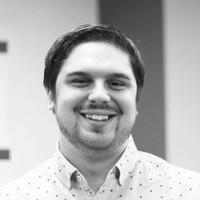

## King County Housing Dataset Analysis

For this project, we'll be exploring the data provided by our client containing housing data for King County. To complete our task, we will use Python3.7 along with several libraries (see Requirements.txt for more information) in order to evaluate the significance between our dataset's features and our target variable, house price.

To complete our analysis, we will follow the OSEMN Data Science process (as outlined here: http://www.dataists.com/tag/osemn/) containing the steps:
1. **Obtain Data**
2. **Scrub Data**
    - Here, we will ensure that missing values are accounted for, that all data is cast to the correct dtype, that non-sensical datapoints are scrubbed or dropped from our dataset.
3. **Explore Data**
    - In this step, we'll cluster, visualize, and view correlations between our features and between our features and target variable. For more information, see Step 3 below.
4. **Models**
    - In this step, we'll implement models that are built to predict and interpret how changes in various features are likely to influence our target variable.
5. **Interpret, Review results**
    - How likely does our model predict new house values accurately?
    - What recommendations might we have for our client, seeking to identify ideal properties for new development and renovation?

## Step 1: Obtain Data

In [1]:
# Importing Libraries:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

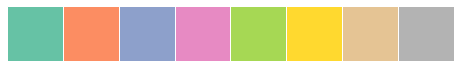

In [2]:
# Defining color palette:
sns.palplot(sns.color_palette('Set2'))

### Color Codes:
1. #66C2A5
2. #FC8D62
3. #8DA0CB
4. #E78AC3
5. #A6D854
6. #FFD92F
7. #E5C494
8. #B3B3B3

In [3]:
# Loading dataset using Pandas:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Step 2:  Scrub Data

### Initial Thoughts:

Great! We have our dataset loaded and we've reviewed our columns and some of their values by printing the dataframe header.  Next, let's get more familiar with our dataset. Before we're able to perform analysis, let's determine:
- How many houses are in our dataset?
- What are our columns? What do they mean?
- Is our data stored appropriately (check type)?
    - Date formatting
    - Type
- Are there any missing values? Outliers? How should we handle these?

In [4]:
# Determining number of houses in dataset:
len(df)

21597

In [5]:
# Identifying columns:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Let's get more information about the datatype of each column. We should be able to identify any columns with missing/invalid values as well as review how data from each column is currently being stored.
<br>

In [6]:
# Printing dataframe information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Before we begin scrubbing data, let's review further:
<br>

From the output above, we can see that our dataset contains 21 columns, and some of our columns are longer than others, indicating the presence of missing values. Before completing our analysis, we'll need to investigate which values are missing, how many, determine their significance, and finally how we'd like to deal with them (perhaps by replacing missing values with the value of the column median or dropping the affected rows/column altogether).

Now that we've taken a closer look at the available data, let's identify our features, our target variable(s), and a bit more about what they mean. To do that, we'll reference the data dictionary provided by the client and do some research of our own.
<br>
<br>

## Provided Data Dictionary:
--------------------------------------------
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors
--------------------------------------------


## Giving Ourselves Some Context:

Before making the necessary changes to clean our sample dataset, I took the time to educate myself on some of the terminology and common practices used in categorizing and quantifying features of houses. For our purposes, we'll use the conventions set by the American National Standards Institute in this brief document:
http://www.themilfordteam.com/How_to_measure_a_house.pdf

--------------------------------------------


## Sample Dataset Feature/Target Analysis and Next Steps:
My first observation is the presence of the 'price' column, which we'll use as our target variable  Price is already stored as a float, but we'll be sure to take a closer look to make sure our other values "make sense" before completing our analysis. Before we do that, let's take a closer look at the features of our sample as we scrub each column in our dataset. 
<br><br>

--------------------------------------------

### 2a. Column 'id' Scrubbing:

**id:** While this variable would be helpful in identifying a specific house (given a key:value pair in our dataset), this categorical variable (stored as int) won't help us in our analysis.
- **We will drop the id column.**

In [7]:
# Dropping 'id':
df.drop('id', axis=1, inplace=True)

In [8]:
# Verifying the change to dataframe:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


### 2b. Column 'date' Scrubbing:

**date:** Identifies the sale date of each house in our sample.  Currently, the value is stored as an object. In order to make this feature useful in our analysis:
- **We will convert the date column to datetype.**
- **We will determine if there are any values that are improperly formatted and make further adjustments as needed.**

In [9]:
# Converting format to datetime:
df.date = pd.to_datetime(df.date)

In [10]:
# Ensuring values fall within the appropriate range (May 2014 - May 2015):
print(f'Description of reformatted date column:') 
print(df.date.describe())
print('\n')
print(f'Minimum: {df.date.min()}.')
print(f'Maximum: {df.date.max()}.')

Description of reformatted date column:
count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object


Minimum: 2014-05-02 00:00:00.
Maximum: 2015-05-27 00:00:00.



All values in the dataset are contained within the specified daterange.

### 2c. Column 'bedrooms' Scrubbing:

**bedrooms:** Identifies the number of bedrooms in a house. As number of bedrooms will likely also correlate with house size, this feature seems relatively likely to correlate with price, our target variable.  Currently stored as an int, it would appear that the data is stored properly. Because it's likely that number of bedrooms will have some correlation with general house size (sqft_living, sqft_lot, bathrooms), we'll also want to check the multicollinearity of these features in particular.
- **We will check max/min values to check for the presence of outliers and/or non-sensical data.**
- **We will evaluate the multicollinearity of our features, paying close attention to bedrooms, bathrooms, sqft_living, and sqft_lot.**

In [11]:
# Reviewing counts for each value in dataset:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Each house contains at least 1 bedroom. That's a good start! The majority of houses in the sample dataset contain between 1-5 bedrooms. We have one house that appears to contain **33 bedrooms!** We will determine the validity of this outlier below.

In [12]:
# Visualizing unique values and initial distribution for bedrooms.
print(f'Unique values for number of bedrooms in sample: \n{df.bedrooms.unique()}.')
print('\n')
print(f'Distribution of number of bedrooms within our dataset: \n{df.bedrooms.describe()}.')

Unique values for number of bedrooms in sample: 
[ 3  2  4  5  1  6  7  8  9 11 10 33].


Distribution of number of bedrooms within our dataset: 
count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64.


In [13]:
# Median value for number of bedrooms in  sample dataset (pre-cleaning).
df.bedrooms.median()

3.0

In [14]:
# Viewing dataset row for house supposedly containing 33 bedrooms:
df.loc[df.bedrooms == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


It is not possible to have 33 bedrooms within a 1620 sqft living space. Instead of dropping this value, let's adjust the number of bedrooms to 3, the sample median (and likely the intended original input).

In [15]:
df.bedrooms.iloc[15856]

33

In [16]:
# Changing number of bedrooms from 33 to 3:
df.bedrooms.iloc[15856] = 3

In [17]:
# Making sure our changes took effect.
df.bedrooms.iloc[15856]

3

In [18]:
# This datapoint is reasonable, with 11 bedrooms in 3000 sqft of living space.
df.loc[df.bedrooms == 11]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,2014-08-21,520000.0,11,3.0,3000,4960,2.0,0.0,0.0,3,7,2400,600.0,1918,1999.0,98106,47.556,-122.363,1420,4960


In [19]:
# Taking another look at the distribution for bedrooms in sample dataset.
df.bedrooms.describe()

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

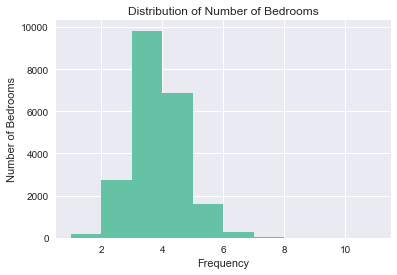

In [20]:
# Visualizing the distribution of Number of Bedrooms:
df.bedrooms.hist(color='#66C2A5')
plt.title("Distribution of Number of Bedrooms")
plt.xlabel("Frequency")
plt.ylabel("Number of Bedrooms")
plt.show()

### 2d. Column 'bathrooms' Scrubbing:

**bathrooms:** Identifies the number of bathrooms in a house. As number of bathrooms will likely also correlate with house size, this feature seems relatively likely to correlate with price, our target variable. Unlike our bedrooms feature, it is common for house bathrooms to be recorded as values other than 0 or 1 depending on the features contained within the bathroom itself (0.5 with only toilet/sink, 0.75 with a sink/toilet/shower but without the presence of a bath, and a value of 1 with all of those components present with a bathtub). As such, we will investigate the bathrooms feature data before making a determination as to whether it would be better to leave the datatype as a float, or convert to an int.
- **We will check max/min values to check for the presence of outliers and/or non-sensical data.**
- **We will determine whether to keep the data stored as a float or convert to an int.**
- **We will evaluate the multicollinearity of our features, paying close attention to bedrooms, bathrooms, sqft_living, and sqft_lot.**  *(See Step 3)*

In [21]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [22]:
# Evaluating assumption above that bathrooms are stored as 
# values of 0.5 or 0.75 depending on features (shower, bath).
for value in df.bathrooms.value_counts():
    uniquevals = []
    if value%.75 == 0:
        value = "True"
        uniquevals.append(value)
    elif value%.5 == 0:
        value = "True"
        uniquevals.append(value)
    else:
        value = "False"
        uniquevals.append(value)
uniquevals

['True']

Now that we've corroborated our assumption, let's take a look at the distribution for bathrooms in sample dataset. We will keep our bathrooms feature stored as a float.

In [23]:
# Reviewing 'bathrooms' feature description
df.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

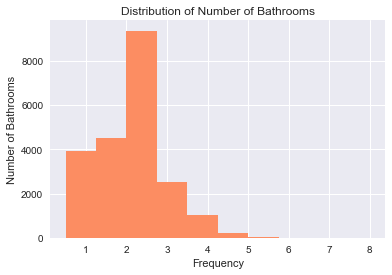

In [24]:
# Visualizing the distribution of Number of Bathrooms:
df.bathrooms.hist(color='#FC8D62')
plt.title("Distribution of Number of Bathrooms")
plt.xlabel("Frequency")
plt.ylabel("Number of Bathrooms")
plt.show()

### 2e. Columns 'sqft_living', 'sqft_lot' Scrubbing:

**sqft_living:** Variable representing the square footage of the living space in a house. Appears to be stored properly.
- **We will investigate for correlation of sqft_living with bathrooms and bedrooms to determine if there are any additional insights we might obtain of the relationship between these features and our target variable, price.**

**sqft_lot:** Variables representing the size of the lot of each house. We may be able to use this variable to determine population density in an area and its correlation to price.  The variable is stored properly and will not likely require manipulation.

In [25]:
# Verifying that values look 'reasonable':
print(f'sqft_living Unique Values: \n{df.sqft_living.unique()}.')
print(f'sqft_living Description: \n{df.sqft_living.describe()}.')
print('\n')
print(f'sqft_lot Unique Values: \n{df.sqft_lot.unique()}.')
print(f'sqft_lot Description: \n{df.sqft_lot.describe()}.')

sqft_living Unique Values: 
[1180 2570  770 ... 3087 3118 1425].
sqft_living Description: 
count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64.


sqft_lot Unique Values: 
[ 5650  7242 10000 ...  5813  2388  1076].
sqft_lot Description: 
count    2.159700e+04
mean     1.509941e+04
std      4.141264e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068500e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64.


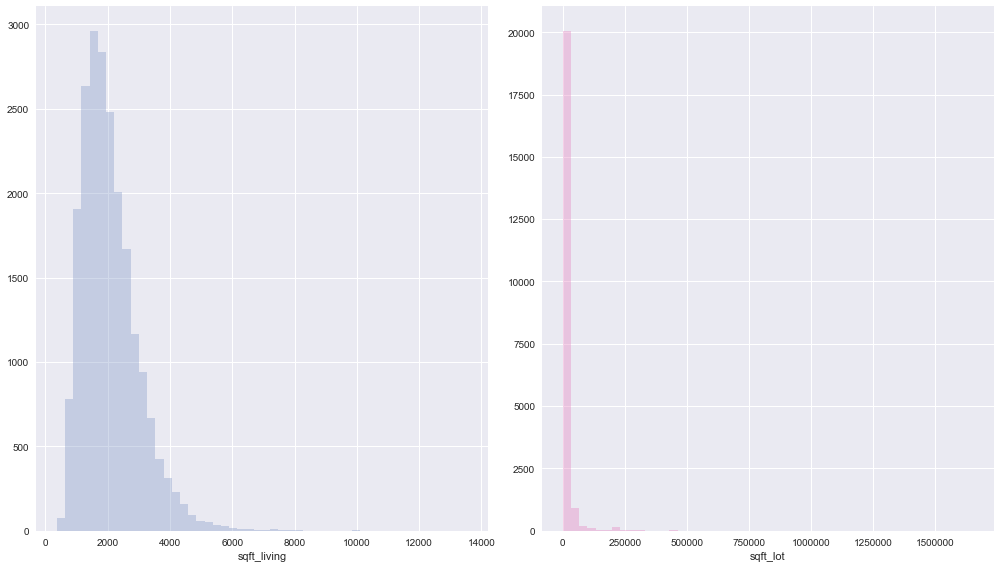

In [26]:
# Visualizing the distributions of 'sqft_living' and 'sqft_lot':
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8), sharex=False, sharey=False)
sns.despine(left=True)

# sqft_living plot:
sns.distplot(df.sqft_living, bins=50, kde=False, color='#8DA0CB', ax=axes[0], norm_hist=False)
# sqft_lot plot:
sns.distplot(df.sqft_lot, bins=50, kde=False, color='#E78AC3', ax=axes[1], norm_hist=False)
plt.tight_layout()

### 2f. Column 'floors' Scrubbing:

**floors:** Variable representing the number of floors in a house. The feature is currently stored as a float. Before converting the datatype of this feature to int, we should determine if there are circumstances where a "floor" of a house may count for a value other than one (perhaps in the case of a basement or attic).
- **We may need to take a closer peek at this feature before making a determination on whether further manipulation is required (specifically int vs float type).**

In [27]:
# Reviewing unique values for floors:
df.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [28]:
# Reviewing value counts for floors:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

It appears that half floors are intentionally present in our dataset based on the number of values containing exactly 1.5, 2.5, and 3.5 floors and that there are no other decimal values in the datset apart from 0.5. The variable floors will remain stored as float type.
<br>

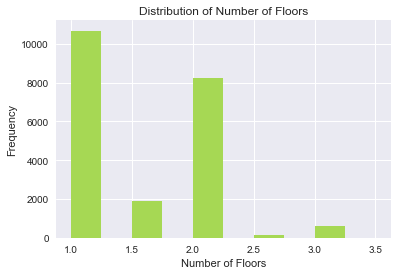

In [29]:
# Visualizing the distribution of Number of Floors:
df.floors.hist(color='#A6D854')
plt.title('Distribution of Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Frequency')
plt.show()

### 2g. Column 'waterfront' Scrubbing:

**waterfront:** Variable represents whether or not a house has a view of the water. This should be stored as a boolean, so it's likely we'll change the datatype from float to bool in our analysis.  Here, we also see that we our missing values, as our column length for waterfront is shorter than the length of our sample dataset.
- **We will investigate the data in order to view the unique values. Our hope is that we will find 2 unique values for the column, allowing us to resolve the column to a boolean.**
- **We will determine how to deal with missing values for this column.**

In [30]:
# We know we want to make waterfront a boolean, but it looks like we have 
# 3 unique column values: 0 (false), 1 (true), and some empty values.
print(f'"waterfront" Unique Values: \n{df.waterfront.unique()}.')
print('\n')
print(f'"waterfront" Value Counts: \n{df.waterfront.value_counts()}.')

"waterfront" Unique Values: 
[nan  0.  1.].


"waterfront" Value Counts: 
0.0    19075
1.0      146
Name: waterfront, dtype: int64.


In [31]:
# Percentage of houses with view of water:
print(146/(19075+146)*100)

0.7595858696217679


With ~99% of houses not having view of the water, it is likely best to replace all unknown values with the column mode (0, or False).

In [32]:
# Replacing missing values with column mode:
df.waterfront.fillna(value=False, inplace=True)

In [33]:
# Setting 'waterfront' to boolean type:
df.waterfront = df.waterfront.astype(bool)
# Verifying output:
print(f'"waterfront" Value Counts: \n{df.waterfront.value_counts()}.')
print('\n')
print(f'"waterfront Description: \n{df.waterfront.describe()}.')

"waterfront" Value Counts: 
False    21451
True       146
Name: waterfront, dtype: int64.


"waterfront Description: 
count     21597
unique        2
top       False
freq      21451
Name: waterfront, dtype: object.


### 2h. Column 'view' Scrubbing:

**view:** Variable representing whether or not the property has been viewed. Currently stored as a float, it is likely that we will convert this feature to a boolean. We also see several missing values in this column. We may choose to either drop these rows from our sample or perhaps replace with the column mode (especially if view is determined to have low correlation with price, our target variable).
- **We will determine what action to take to resolve missing values.**
- **We will likely convert this value to a boolean.**

In [34]:
# Printing 'view' variable info and evaluating missing data:
print(f'Unique Values: \n{df.view.unique()}.')
print('\n')
print(f'Sum of Value Counts: \n{df.view.value_counts().sum()}.')
print('\n')
print(f'Description of View: \n{df.view.describe()}.')

Unique Values: 
[ 0. nan  3.  4.  2.  1.].


Sum of Value Counts: 
21534.


Description of View: 
count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64.


In [35]:
# Identifying column mode:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

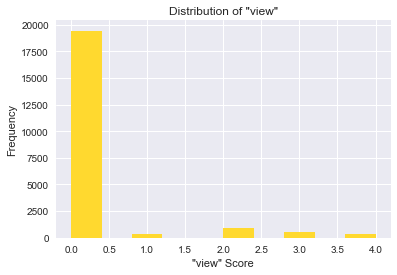

In [36]:
# Visualizing distribution of 'view':
df.view.hist(color='#FFD92F')
plt.title('Distribution of "view"')
plt.xlabel('"view" Score')
plt.ylabel('Frequency')
plt.show()

### 2i. Column 'condition' Scrubbing:

**condition:** Variable representing the overall condition of the house and property.  Variable is currently stored as int, but may be better suited to categorical, depending on the values found in the dataset.
- **We will investigate the values in our sample dataset in order to determine the most logical way to store our condition feature.**

In [37]:
print(f'Unique Values: \n{df.condition.unique()}.')
print('\n')
print(f'Column Description: \n{df.condition.describe()}.')

Unique Values: 
[3 5 4 1 2].


Column Description: 
count    21597.000000
mean         3.409825
std          0.650546
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64.


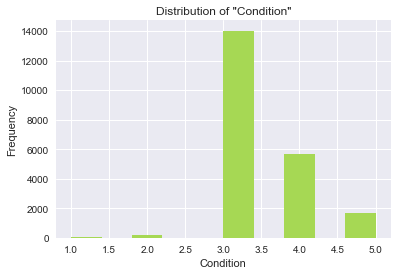

In [38]:
# Visualizing distribution for 'condition':
df.condition.hist(color='#A6D854')
plt.title('Distribution of "Condition"')
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.show()

It does not appear that any changes are necessary.

### 2j. Column 'grade' Scrubbing:

**grade:** Variable representing grade given to a housing unit by the county. 
- **We will investigate this feature in a similar manner to our condition feature above.**

In [39]:
# Checking unique values to determine scale:
print(f'Unique Values: \n{df.grade.unique()}.')
print('\n')
# Checking value counts to ensure no improperly formatted values occur:
print(f'Sum of Value Counts: \n{df.grade.value_counts().sum()}.')

Unique Values: 
[ 7  6  8 11  9  5 10 12  4  3 13].


Sum of Value Counts: 
21597.


It does not appear that any changes are necessary.

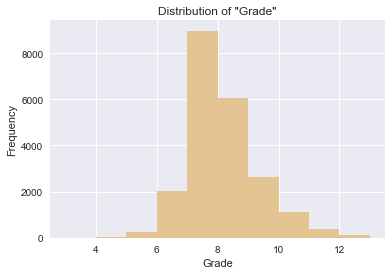

In [40]:
# Visualizing distribution for Grade:
df.grade.hist(color='#E5C494')
plt.title('Distribution of "Grade"')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

### 2k. Columns 'sqft_above', 'sqft_basement' Scrubbing:

**sqft_above, sqft_basement:** I grouped these variables, because they give us the same information as our "sqft_living" column above, but separating the values into above/below ground.  We may use this variable to determine the presence of a basement in a house, as well as its impact on value, and perhaps how subturranean square footage compares in value to to above ground square footage.
- **We will use this data to determine whether the house has a basement.**
- **We *may* be able to use this data to make a determination regarding the relative values of above/below ground living space.**

In [41]:
# Obtaining more information for 'sqft_above':
df.sqft_above.describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

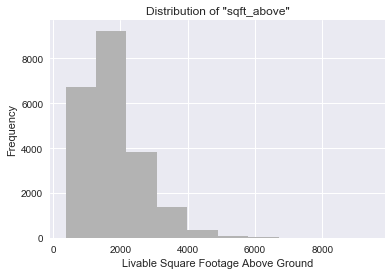

In [42]:
# Visualizing distribution for 'sqft_above':
df.sqft_above.hist(color='#B3B3B3')
plt.title('Distribution of "sqft_above"')
plt.xlabel('Livable Square Footage Above Ground')
plt.ylabel('Frequency')
plt.show()

In [43]:
# Obtaining more information for 'sqft_basement':
df.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

Since we want to convert this feature to float type, let's examine unique column values to determine if there are any values that will interfere with recasting dtype.

In [44]:
# Obtaining unique values for 'sqft_basement':
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [45]:
# Change dtype to float and replace all errors ('?') with a value of 0.
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce').fillna(0).astype(np.float64)

In [46]:
# Verifying output:
print(f'Value Counts: \n{df.sqft_basement.value_counts()}.')
print('\n')
print(f'"sqft_basement" Description: \n{df.sqft_basement.describe()}.')

Value Counts: 
0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
360.0        72
          ...  
2600.0        1
2610.0        1
276.0         1
274.0         1
1245.0        1
143.0         1
266.0         1
862.0         1
2180.0        1
415.0         1
243.0         1
1135.0        1
1525.0        1
3000.0        1
172.0         1
225.0         1
518.0         1
935.0         1
1920.0        1
1930.0        1
1990.0        1
588.0         1
1548.0        1
2390.0        1
602.0         1
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqf

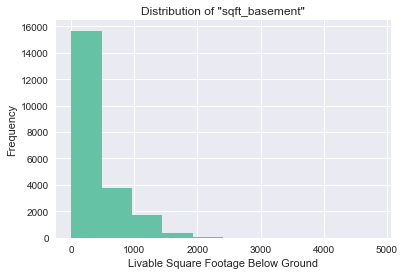

In [47]:
# Visualizing 'sqft_basement' distribution:
df.sqft_basement.hist(color='#66C2A5')
plt.title('Distribution of "sqft_basement"')
plt.xlabel('Livable Square Footage Below Ground')
plt.ylabel('Frequency')
plt.show()

Visualization of the ditribution in basement size indicates a strong positive skew. As our column mode is 0, it is safe to assume that these houses do not have a basement. Therefore, it may be prudent to recast 'sqft_basement' as bool type in our data exploration. This change might help to determine the effect that having/not having a basement has on the sale price of houses in the dataset. For now, no further changes are necessary.

### 2l. Column 'yr_built' Scrubbing:

**yr_built:** The yr_built feature should represent the year the house was originally constructed. The data appears to be stored as float type, which we will *not* likely need to change for our analysis.

In [48]:
# Obtaining more information for 'yr_built':
df.yr_built.describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [49]:
df.yr_built = df.yr_built.astype(np.int64)

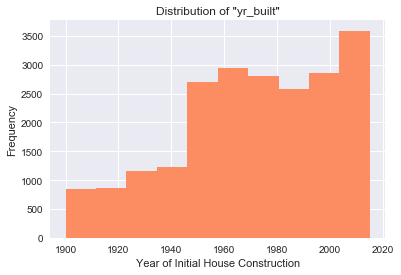

In [50]:
# Visualizing 'yr_built' distribution:
df.yr_built.hist(color='#FC8D62')
plt.title('Distribution of "yr_built"')
plt.xlabel('Year of Initial House Construction')
plt.ylabel('Frequency')
plt.show()

### 2m. Column 'yr_renovated' Scrubbing:

**yr_renovated:** The yr_renovated variable represents the year of the most recent renovation on the property.  We will likely want to change this variable to an int (matching the data type of our yr_built feature).  There are a larger number of missing values for this feature than we've seen in any of our other features so far, almost 4,000 total. This makes sense, since there is not likely to be any data for houses that have not been renovated since their construction.
- **We will need to make a determination on how to handle the missing values in this column.**

In [51]:
# Obtaining more information for 'yr_renovated':
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

As noted above, we're missing a lot of values from our year renovated column. It's reasonable to assume that these missing values indicate that no renovation has taken place. We can replace these values with '0' to scrub column data.

In [52]:
# Replacing missing values with '0':
df.yr_renovated.fillna(0.0, inplace=True)

In [53]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [54]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [55]:
df.yr_renovated.describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

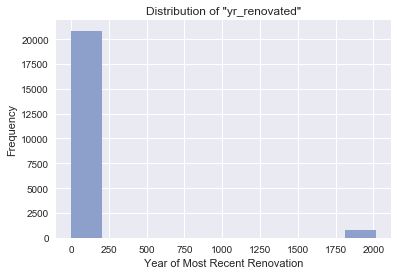

In [56]:
# Visualizing 'yr_renovated' distribution:
df.yr_renovated.hist(color='#8DA0CB')
plt.title('Distribution of "yr_renovated"')
plt.xlabel('Year of Most Recent Renovation')
plt.ylabel('Frequency')
plt.show()

We might also consider evaluating distribution of 'yr_renovated' as well as its correlation with 'price' after removing values of 0. However, due to the small sample size of values matching this criteria, the results are less likely to be significant and may also skew the results of modeling.

### 2n. Column 'zipcode' Scrubbing:

**zipcode:** This variable represents the zipcode in which the property is located.
- **We will cast the zipcode feature to a categorical datatype.** 
- **We will explore the use of One Hot Encoding for the zipcode feature in order to bolster its usefullness in our modeling.** *(Step 3)*

In [57]:
# Reviewing data:
df.zipcode.describe()

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [58]:
# Converting zipcode to categorical variable:
df.zipcode = df.zipcode.astype(str)

In [59]:
# Reviewing unique values:
df.zipcode.unique()
# Reviewing value counts for 'zipcode':
df.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
98001    361
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    233
98105    229
98045    220
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    117
98109    109
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Presently, there are no further changes required for 'zipcode' analysis. However, due to the large amount of unique values, it may become necessary to segment zipcodes by number of values (either by binning or by selecting **'x'** Zipcodes with the largest number of values.

### 2o. Columns 'lat', 'long' Scrubbing:

**lat, long:** Variables that represent the physical location of each property.  The variables are correctly stored as float type.

In [60]:
# Obtaining more information for 'lat':
df.lat.describe()

count    21597.000000
mean        47.560093
std          0.138552
min         47.155900
25%         47.471100
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [61]:
# Obtaining more information for 'long':
df.long.describe()

count    21597.000000
mean      -122.213982
std          0.140724
min       -122.519000
25%       -122.328000
50%       -122.231000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

The range and standard deviation of latitude/longitude are small, suggesting that they likely represent realistic values for an area the size of King County. Both features are correctly cast as float type. No further changes are necessary at this point.
<br>

### 2p. Columns 'sqft_living15', 'sqft_lot15' Scrubbing:

**sqft_living15:** Variable representing the living space of the 15 closest neighbors.

**sqft_lot15:** Variable representing the lot size of the 15 closest neighbors. 
- **It appears that the sqft (neighbors) variables are correctly stored as int type.**
- **We may be able to use this data in order to determine trends in neighborhood pricing or perhaps determine the correlation house value and whether the value of the surrounding houses may influence price.**

In [62]:
# Obtaining more information for 'sqft_living15':
df.sqft_living15.describe()

count    21597.000000
mean      1986.620318
std        685.230472
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

In [63]:
# Obtaining more information for 'sqft_lot15':
df.sqft_lot15.describe()

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null bool
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(8), int64(9), object(1)
memory usage: 3.2+ MB


## Step 3: Explore Data

As we begin the exploratory phase, we'll further analyze and visualize feature variables and measure their correlation to house sale price and between themselves.

As we explore the data, we'll seek to answer:
<br>
<br>
**1. How does location influence house sale price?**
    - Our goal is to identify "hot" markets where house renovation will likely yield the greatest increase in house sale price.
    
**2. Which feature most strongly influences house sale price?**
    - This data will allow us to recommend specific recommendations regarding the most cost effective improvements to make during renovation in order to increase house sale price.
    
**3. Is there significant multicollinearity in our dataset that might diminish the efficacy of our models?** *(see Step 4)*

**4. Which is a better predictor of house sale price, size of living space or size of lot?**

### Exploring House Price:

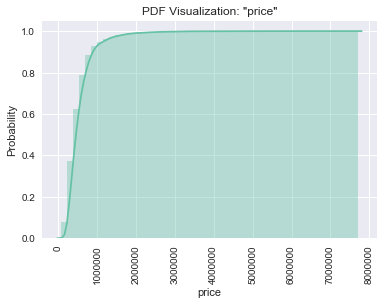

In [65]:
# Visualizing cumulative distribution for 'price':
sns.set_palette('Set2')
fig = plt.figure(figsize=(6,4))
plt.xlabel('Price')
plt.ylabel('Probability')
plt.title('PDF Visualization: "price"')
plt.xticks(rotation = 90)
sns.distplot(df.price,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

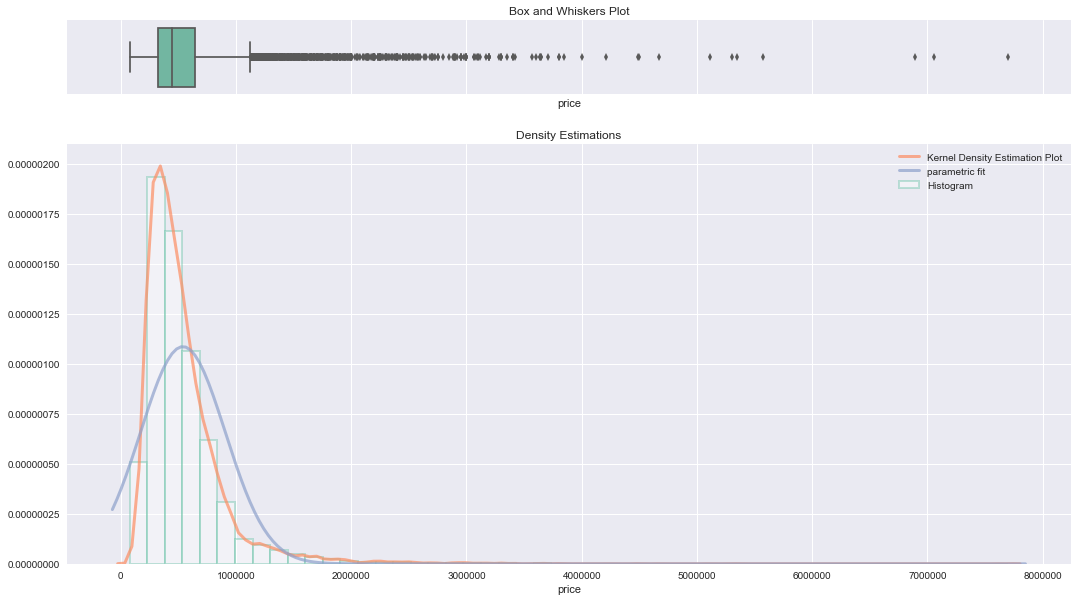

In [66]:
# Visualizing KDE, PMF, Hist for 'price':
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (18,10))
sns.distplot(df.price,
            hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'#66C2A5',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "#FC8D62",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : '#8DA0CB',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=df.price, ax = ax,color = '#66C2A5')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, 0.0000021))
plt.ylim(0, 0.0000021)
plt.legend(loc='best')

Initial visualizations suggest a slight positive skew in the distribution of house prices within the dataset due to the presence of a large number of very expensive outliers spotted easily by the box and whisker subplot in the figure above.. Our next step is to explore what features have the greatest influence on house sale price.

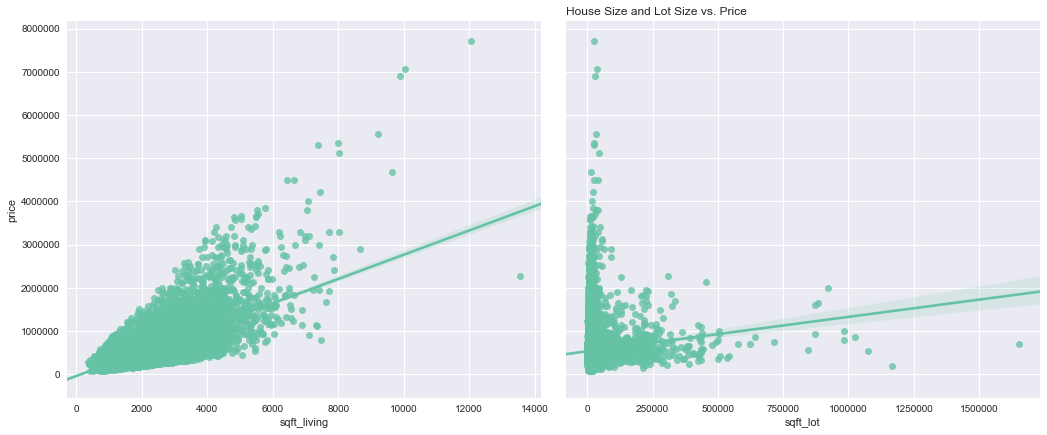

In [67]:
# Visualizing correlation between living space:price and lot space:price.
sns.pairplot(df, kind='reg', x_vars = ('sqft_living', 'sqft_lot'),
             y_vars="price", height=6, aspect=1.2, palette='Set2')
plt.title('House Size and Lot Size vs. Price', loc='left')
plt.show()

As discussed previously, there are a large number of houses with very small lotsizes (condos, townhomes). In order to filter our these results, let's select a sample of homes whose lot size is at least 2000 square feet (an approximation of the mean value for sqft_living in dataset) but not greater than 15,246 square feet (0.35 acres). Our goal is to determine if the strength of the correlation between lot/size: price is more strongly correlated with "normal houses" in our dataset.

In [68]:
# Selecting all rows with non-zero values for 'sqft_lot':
no_zero_lot_df = df[((df.sqft_lot >= 2000) & (df.sqft_lot <= 15246))]
# Verifying output:
print(f'Unique Values: \n{no_zero_lot_df.sqft_lot.unique()}.')
print(f'Minimum Value (no_zero_lot_df): {min(no_zero_lot_df.sqft_lot)}.')
print(f'Minimum Value (df): {min(df.sqft_lot)}.')
print('\n')
print(f'Maximum Value (no_zero_lot_df): {max(no_zero_lot_df.sqft_lot)}.')
print(f'Maximum Value (df): {max(df.sqft_lot)}.')
print('\n')
print(no_zero_lot_df.sqft_lot.describe())

Unique Values: 
[ 5650  7242 10000 ...  5536  5813  2388].
Minimum Value (no_zero_lot_df): 2000.
Minimum Value (df): 520.


Maximum Value (no_zero_lot_df): 15246.
Maximum Value (df): 1651359.


count    17245.000000
mean      7406.047608
std       2847.535980
min       2000.000000
25%       5100.000000
50%       7250.000000
75%       9242.000000
max      15246.000000
Name: sqft_lot, dtype: float64


As seen above, even after greatly limiting the scope of our analysis, there are still ~17,000 values remaining in our database. 

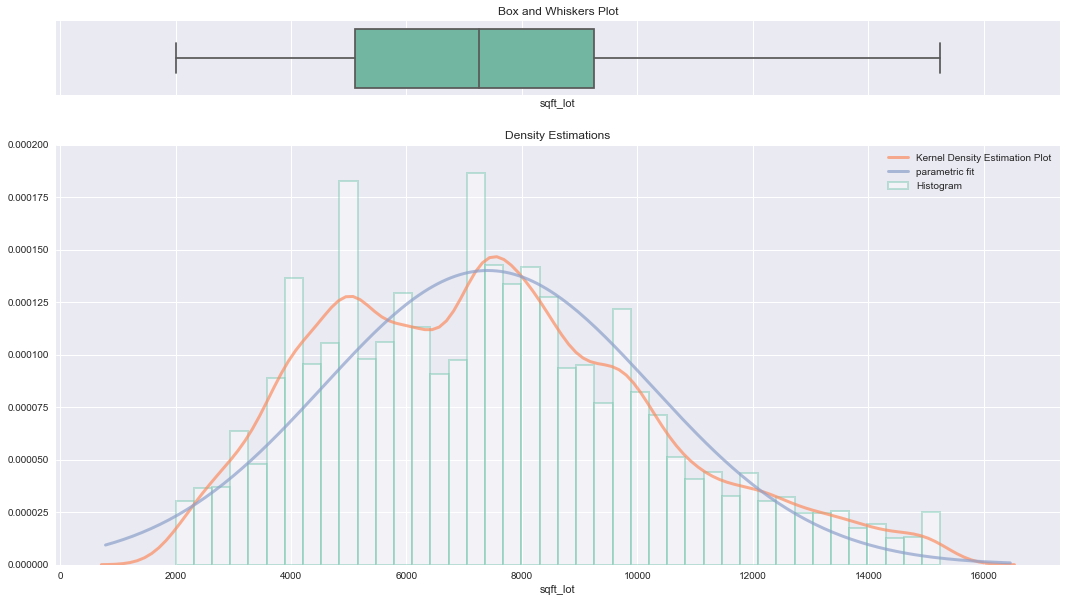

In [69]:
# Visualizing KDE, PMF, Hist for 'sqft_lot' (no_zero_lot_df):
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (18,10))
sns.distplot(no_zero_lot_df.sqft_lot,
            hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'#66C2A5',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "#FC8D62",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : '#8DA0CB',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=no_zero_lot_df.sqft_lot, ax = ax,color = '#66C2A5')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, 0.0002))
plt.ylim(0, 0.0002)
plt.legend(loc='best')

It appears that the majority of the values in the dataset fall within ~4,000-10,000 square feet. Let's take another look at the correlation between price and our new subset of sqft_lot.

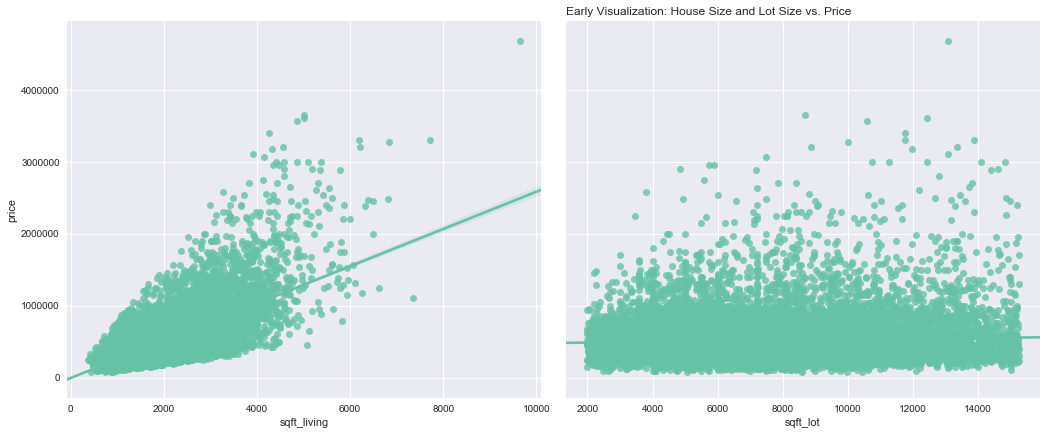

In [70]:
# Re-reviewing correlation:
sns.pairplot(no_zero_lot_df, kind='reg', x_vars = ('sqft_living', 'sqft_lot'),
             y_vars="price", height=6, aspect=1.2, palette='Set2')
plt.title('Early Visualization: House Size and Lot Size vs. Price', loc='left')
plt.show()

"Location, location, location!"

As demonstrated above, after segmenting the dataframe, the correlation between sqft_living:price remains relatively similar while the correlation between sqft_lot:price drops to ~0. Despite not finding a correlation, these results are significant. They allow us to confirm that the correlation between sqft_living:price remains similar when discarding houses from the datset very small and large lot sizes. They also lead us to attempt to validate another assumption, lot size:price varies greatly based on some other factors, such as **location**. 

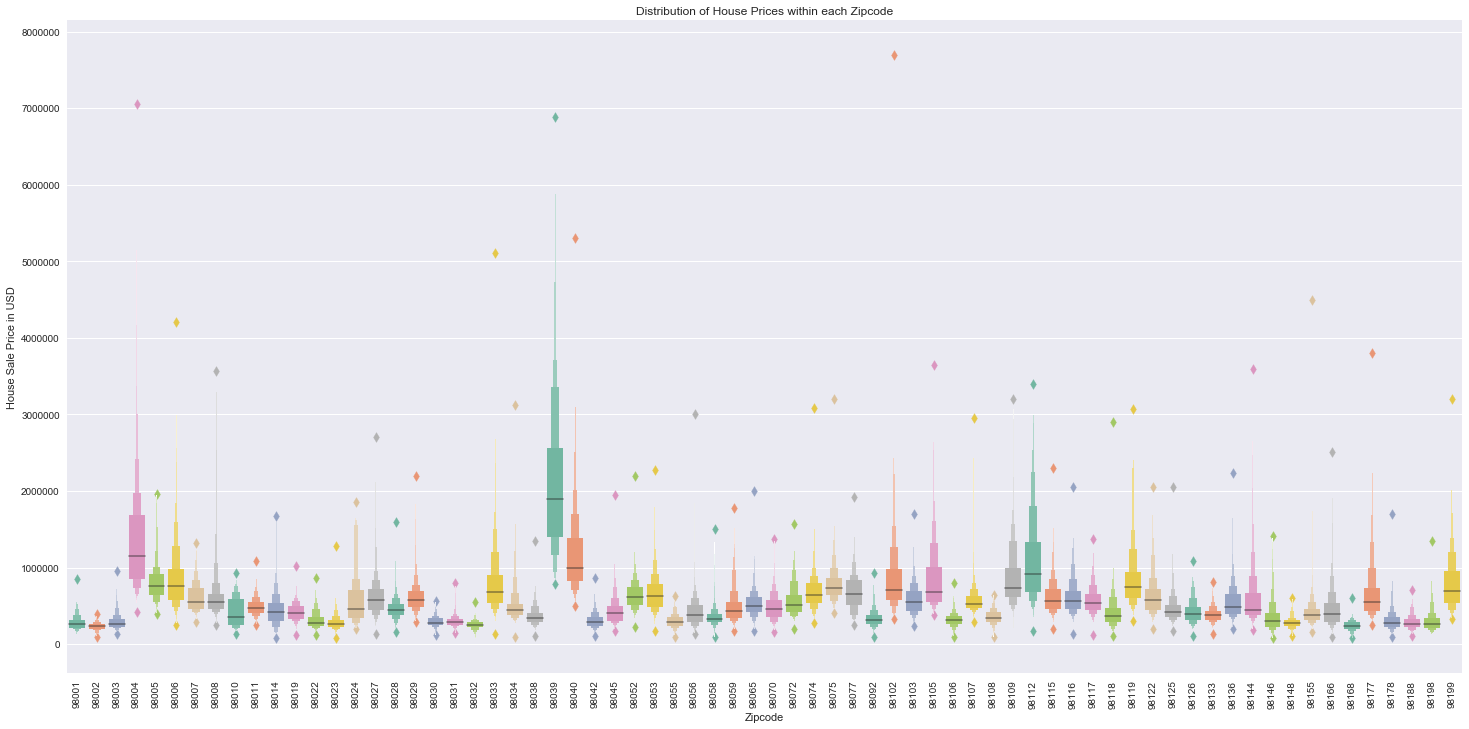

In [71]:
# Visualizing the distribution of House price by Location (Zipcode):
fig = plt.figure(figsize=(25, 12))
fig = sns.boxenplot(x='zipcode', y = 'price', data=df, palette="Set2")
plt.title('Distribution of House Prices within each Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('House Sale Price in USD')
plt.xticks(rotation = 90)

plt.show()

It appears that some Zipcodes have a much larger variance in house price (usually alongside a higher maximum value). These findings may be significant, as they may allow our client to more accurately predict renovation opportunities with greater 'upward mobility' or ceiling to the change in price. To better visualize these datapoints, we'll select the 20 Zipcodes with the greatest number of values.

In [72]:
# Selecting the 20 Zipcodes containing the largest number of values.
print(df.zipcode.value_counts().nlargest(n=20))

98103    602
98038    589
98115    583
98052    574
98117    553
98042    547
98034    545
98118    507
98023    499
98006    498
98133    493
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    409
98056    406
98053    403
Name: zipcode, dtype: int64


In [73]:
# Selecting data for the 20 'largest' Zipcodes:
fig
zip20_df = df[(df.zipcode.isin(['98103', '98038', '98115', '98052', '98117', '98042', 
                        '98034', '98118', '98023', '98006', '98133', '98059', 
                        '98058', '98155', '98074', '98033', '98027', '98125', 
                        '98056', '98053']))]
# Verifying Output:
print(f'Unique Values: \n{zip20_df.zipcode.unique()}.')
print(f'Number of Values Remaining: \n{zip20_df.zipcode.value_counts().sum()}.')
print(f'Number of Zipcodes Remaining: \n{len(zip20_df.zipcode.unique())}.')

Unique Values: 
['98125' '98074' '98053' '98038' '98115' '98103' '98133' '98052' '98027'
 '98117' '98058' '98056' '98023' '98042' '98059' '98034' '98118' '98006'
 '98033' '98155'].
Number of Values Remaining: 
9862.
Number of Zipcodes Remaining: 
20.


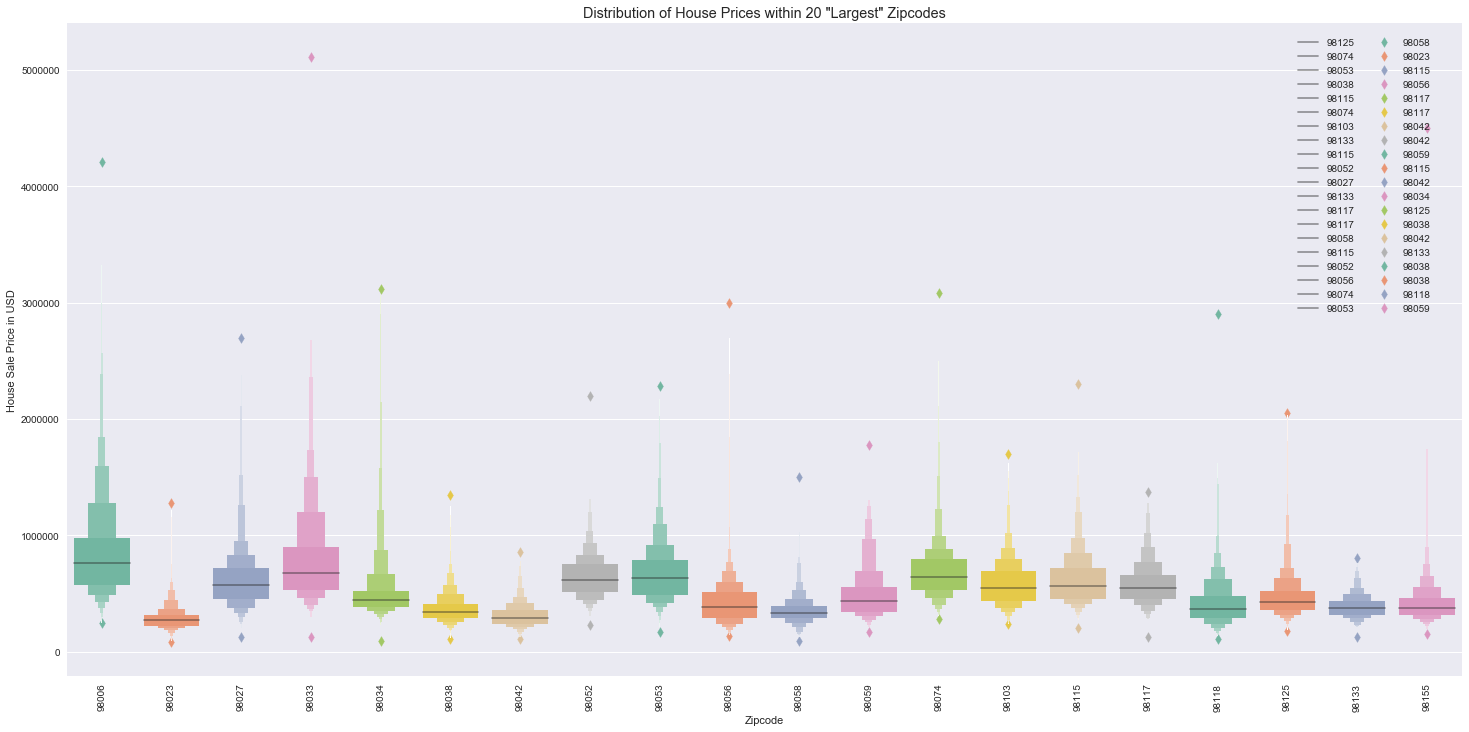

In [74]:
# Visualizing the distribution of House price by Location (zip20_df.zipcode):
fig = plt.figure(figsize=(25, 12))
fig = sns.boxenplot(x='zipcode', y = 'price', data=zip20_df, palette="Set2")
plt.title('Distribution of House Prices within 20 "Largest" Zipcodes', fontsize ='x-large')
plt.xlabel('Zipcode')
plt.ylabel('House Sale Price in USD')
plt.legend(zip20_df.zipcode, loc=(.88, .55), ncol=2)
plt.xticks(rotation = 90)

plt.show()

Reviewing the visualization above of house sale price distribution within the 20 largest zipcodes, there are several zipcodes that show a notably larger variance in price, as well as a higher maximum.  Our next step will be to identify additional correlations within the following Zipcodes:
- 98006
- 98033
- 98053
- 98074

In [75]:
# Selecting 4 zipcodes with largest maximums/variance in house price:
zip04_df = zip20_df[df.zipcode.isin(['98006', '98033', '98053', '98074'])]
# Verifying Output:
print(f'Unique Values: \n{zip04_df.zipcode.unique()}.')
print(f'Number of Values Remaining: \n{zip04_df.zipcode.value_counts().sum()}.')
print(f'Number of Zipcodes Remaining: \n{len(zip04_df.zipcode.unique())}.')

Unique Values: 
['98074' '98053' '98006' '98033'].
Number of Values Remaining: 
1774.
Number of Zipcodes Remaining: 
4.


/Users/paulw/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


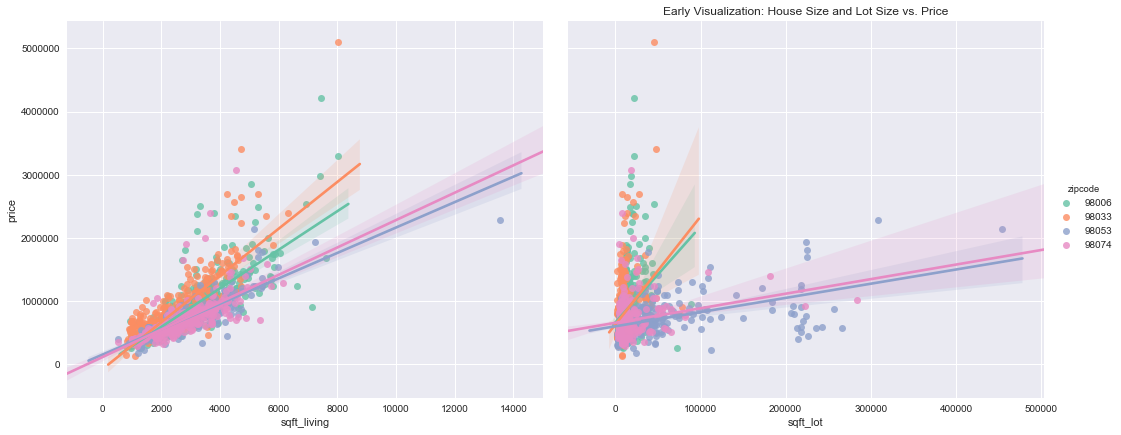

In [76]:
# Visualizing correlation between sqft_living:price and
# sqft_lot:price in the 4 "hottest" Zipcodes:
sns.pairplot(zip04_df, kind='reg', x_vars = ('sqft_living', 'sqft_lot'),
             y_vars="price", hue='zipcode', height=6, aspect=1.2, palette='Set2')
plt.title('Early Visualization: House Size and Lot Size vs. Price')
plt.show()

Reviewing our visualization above, zipcode (and thus, location) has a significant influence on the correlation between house/lot size and price. Based on these results, increasing house-size through renovation would likely have a greater influence on its sale price in zipcodes 98033 and 98006. Based on these results, it is worth reviewing our other features within the zip04 subset to compare with the results from the entire dataset.

In [77]:
# Reprinting info in order to drop incompatible columns:
zip04_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1774 entries, 4 to 21583
Data columns (total 20 columns):
date             1774 non-null datetime64[ns]
price            1774 non-null float64
bedrooms         1774 non-null int64
bathrooms        1774 non-null float64
sqft_living      1774 non-null int64
sqft_lot         1774 non-null int64
floors           1774 non-null float64
waterfront       1774 non-null bool
view             1771 non-null float64
condition        1774 non-null int64
grade            1774 non-null int64
sqft_above       1774 non-null int64
sqft_basement    1774 non-null float64
yr_built         1774 non-null int64
yr_renovated     1774 non-null float64
zipcode          1774 non-null object
lat              1774 non-null float64
long             1774 non-null float64
sqft_living15    1774 non-null int64
sqft_lot15       1774 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(8), int64(9), object(1)
memory usage: 278.9+ KB


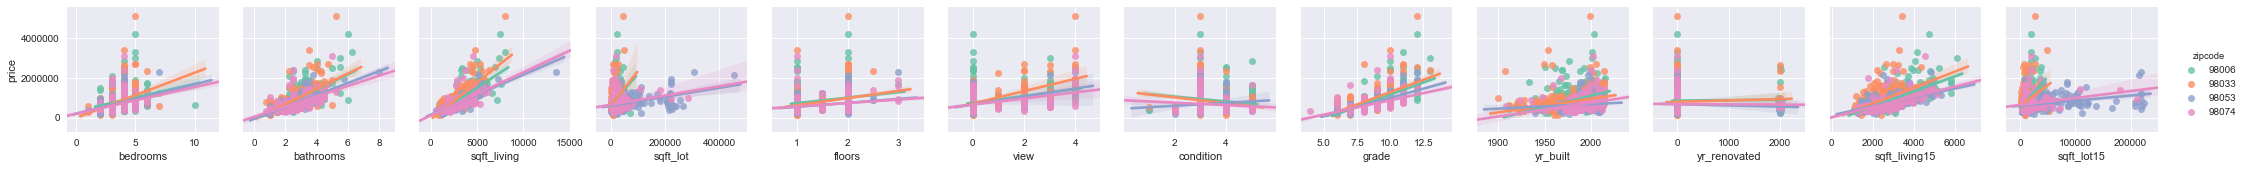

In [78]:
# Reviewing correlation within zip04_df data subset:
sns.pairplot(data=zip04_df, x_vars=('bedrooms', 'bathrooms', 
                               'sqft_living', 'sqft_lot', 'floors', 'view', 
                               'condition', 'grade', 'yr_built', 'yr_renovated', 
                               'sqft_living15', 'sqft_lot15'), y_vars='price', hue='zipcode', 
             kind="reg", palette='Set2')

plt.show()

Reviewing the correlelogram above, we can see that the same predictors for house price we previously identified as significant in the dataset (bedrooms, bathrooms, sqft_living, sqft_living15) are present in this subset of 4 zipcodes as well. 

In addition to the previous results that indicated that lot size is more strongly correlated with house sale price in specific zipcodes, we can observe a similar trend similar to the test visualization performed between sqft_living, sqft_lot: price. These results, in addition to the greater variance within house price itself within the 4 zipcode subset suggest that in order to maximize client ROI for renovations, renovations should be targeted to houses located in zipcodes 98033 and 98006.

### Evaluating Multicollinearity:

To continue data exploration, we'll construct a heatmap to measure correlations between the variables in our dataset.  Before reviewing the results, we will identify expected correlations between our variables based on current knowledge.

#### Assumptions:

**Assumptions between features and target variable:**
- Larger houses (sqft_living, sqft_above, sqft_basement) are likely to cost more.
- Houses with more bedrooms and more bathrooms are likely to cost more.
- Houses in better condition (condition, grade) are likely to cost more.
- Houses with larger lots (sqft_lot) are likely to cost more for houses specifically. After reviewing the distribution of lot sizes in our dataset, we see that many of our datapoints have no lotsize. Because condos/townhomes are clearly included in our dataset, we would expect a weaker correlation between lotsize/price than between square footage and price.

**Assumptions between features:**
- Larger houses (sqft_living, sqft_above, sqft_basement) likely contain a greater number of bathrooms and bedrooms.
- Houses with more bedrooms are likely to be larger and will therefore have some correlation with number of bathrooms (the reverse is also likely to be true).
- Sqft_living is likely correlated with sqft_above and (to a lesser degree since not all houses will have basements) sqft_below because they are all measures of size of indoor space.

Text(0.5, 1.0, 'Multicollinearity between Variables in the King County Housing Dataset')

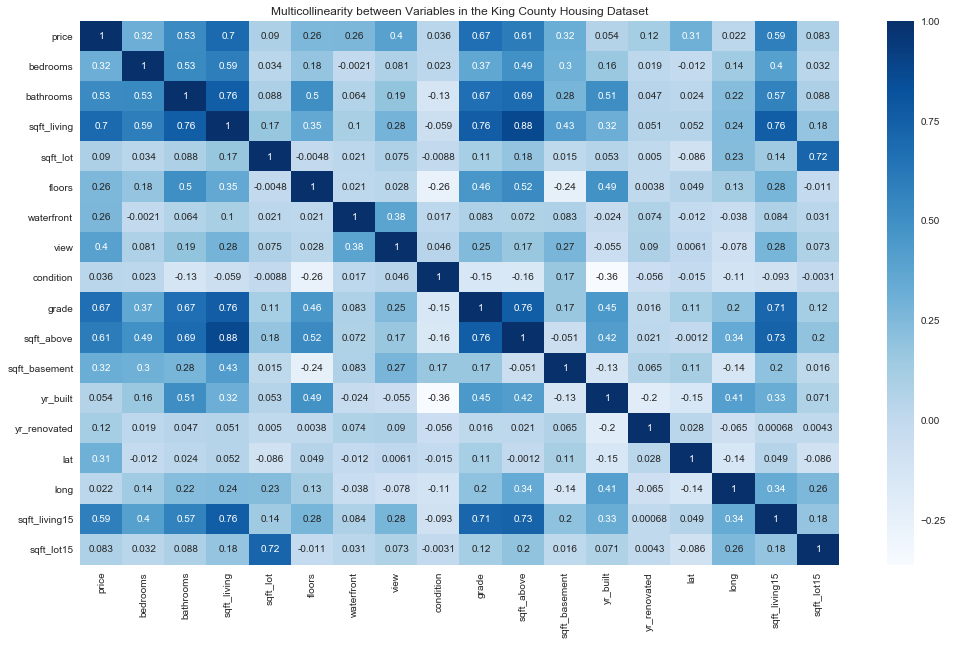

In [79]:
# Evaluating multicollinearity:
corr = df.corr()
fig = plt.figure(figsize=(17,10))
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', cbar=True)
ax.set_title("Multicollinearity between Variables in the King County Housing Dataset")

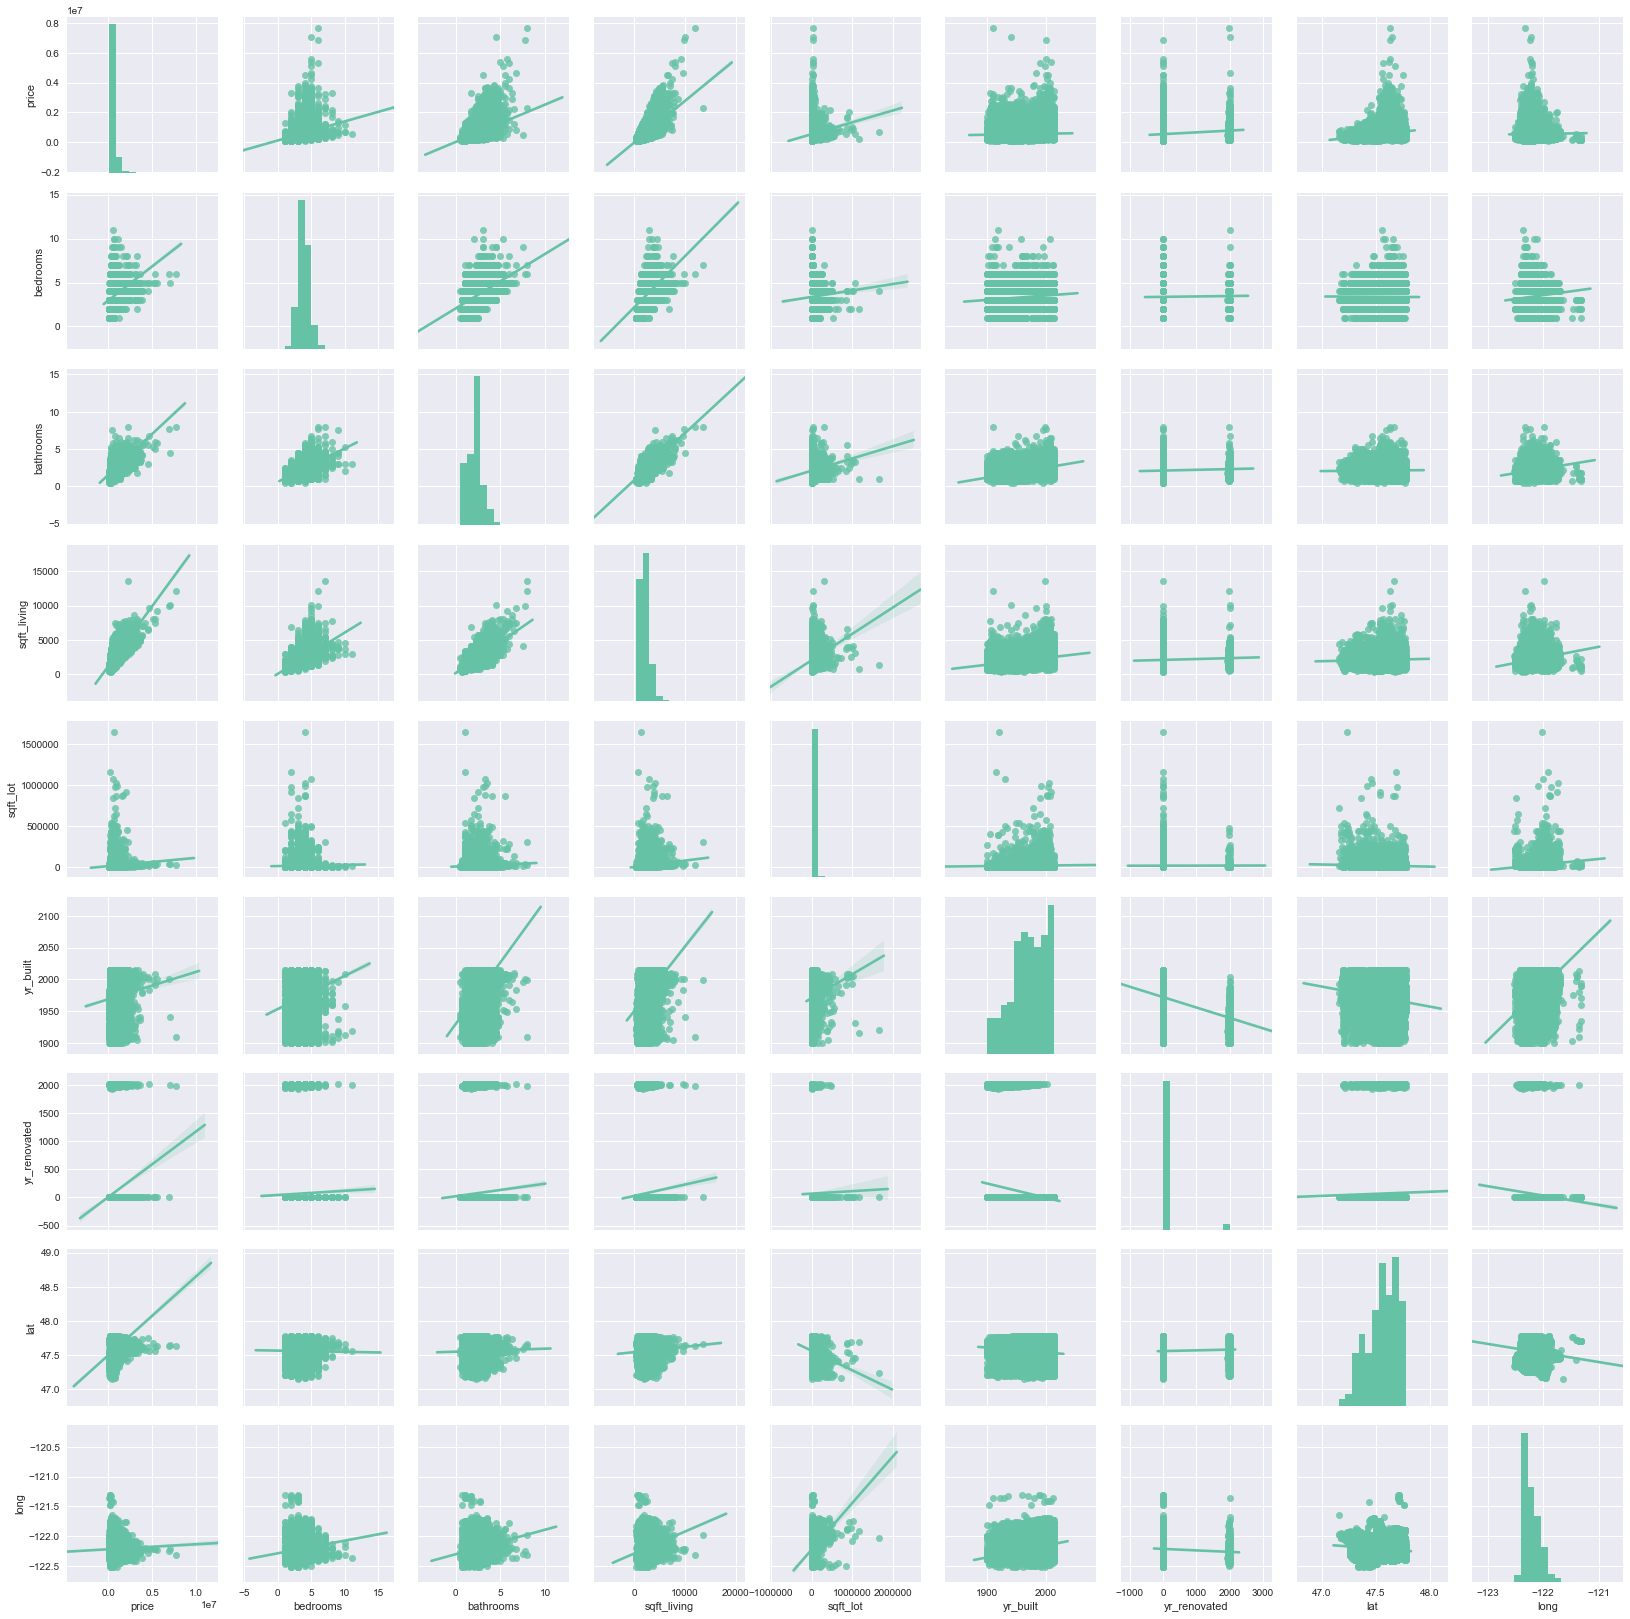

In [80]:
# Reviewing correlelogram:
sns.pairplot(data=df, kind="reg", vars=('price', 'bedrooms', 'bathrooms', 
                                             'sqft_living', 'sqft_lot', 
                                             'yr_built', 'yr_renovated', 
                                             'lat', 'long'), palette='Set2')

plt.show()

### Results of Multicollinearity Test:
The results of our heatmap support some of our assumptions above, but also challenge several others. Below, we'll review the significant correlations between variables in our dataset and determine how best to manipulate our data further to reduce skew.

**Observations between features and target variable:**
- The correlation between bathrooms and price is stronger than the correlation between bedrooms and price, suggesting that number of bathrooms is a stronger indicator of house sale price than number of bedrooms.
    - bathrooms:price = 0.53
    - bedrooms:price = 0.32

- As expected, the square footage of our living space has a relatively strong (the strongest of all our variables) correlation with house sale price. Additionally, the relationship between above ground square footage is correlated positively with price. The correlation between basement square footage and price is much weaker. Since not all properties will have a basement, this also makes sense.  Contrary to our hypothesis, the correlation between lotsize and house price is extremely low, likely due the presence of condos/townhomes in our dataset as well as the variable price of land based on other factors we didn't examine, such as population density etc. The correlation between the square footage of living space of the 15 nearest neighbors and price suggests that house prices fluctuate by neighborhood.     
    - <span style="color:red">**sqft_living:price = 0.70**</span>
    - sqft_above:price = 0.61
    - sqft_living15:price = 0.59
    - sqft_basement:price = 0.32
    - sqft_lot:price = .09

- Surprisingly, there is almost no correlation between condition and price. However, we do see a relatively strong correlation between grade:price.  
    - grade:price = 0.67
    - condition:price = 0.04

<span style="color:red"></span>

**Assumptions between features:**
- As we expected, there is a positive correlation between living space and the number of bedrooms and bathrooms. The most significant of these correlations occurs between the square footage of living space and number of bathrooms (0.76). As we discussed above, logically this makes sense as larger homes will have more space for additional bathrooms and bedrooms. We also see a relatively strong correlation between square footage of target house and its surrounding neighbors (0.76). Unsurprisingly, also see a very strong correlation (0.88) between sqft_living and sqft_above. Though this correlation is logical, as both variables measure size of living space (and not all houses have basements), the correlative strength between sqft_living and sqft_above may skew the results of our predictive modeling. 
    - <span style="color:red">**sqft_living:sqft_above = 0.88**</span>
    - <span style="color:red">**sqft_living:bathrooms = 0.76**</span>
    - <span style="color:red">**sqft_living:sqft_living15 = 0.76**</span>
    - sqft_living:bedrooms = 0.59
- In order to investigate the possibility for multicollinearity error presented by our findings above that sqft_living and sqft_above are very strongly correlated, we will investigate similarities in correlation between sqft_living:vars and sqft_above:vars.
    - <span style="color:red">**sqft_above:sqft_living = 0.88**</span> (vs. 0.88)
    - <span style="color:red">**sqft_above:sqft_living15 = 0.76**</span> (vs. 0.76)
    - <span style="color:red">**sqft_above:grade = 0.71**</span> (vs. 0.67)
    - sqft_above:bathrooms = 0.69 (vs. 0.76)

- Reviewing sq
    - <span style="color:red">**sqft_living15:sqft_living = 0.76**</span>
    - <span style="color:red">**sqft_living15:grade = 0.71**</span>
    - sqft_living15:bathrooms = 0.57
    - sqft_lving15:bedrooms = 0.40
<br>
<br>

**Evaluation of Multicollinearity and Shaping the Parameters of our Model:** 
<br>
Because sqft_living and sqft_above are both measures of house size, are relatively highly correlated feature variables we have identified as significant, not all houses have basements, and the correlation between sqft_living:price (0.70) is higher than that of sqft_above:price (0.61), we will likely choose to discard the sqft_above and sqft_basement variables from our model.

Before dropping the sqft_basement column entirely, let's recast to bool type to help ascertain whether presence of a basement itself has a significant correlation with house sale price.

**Note:** After modeling, I have decided to remove the sqft_living variable to reduce multicollinearity below.

In [81]:
# Recasting 'sqft_basement' to bool type:
df.sqft_basement = df.sqft_basement.astype(bool)
# Verifying output:
df.sqft_basement.unique()

array([False,  True])

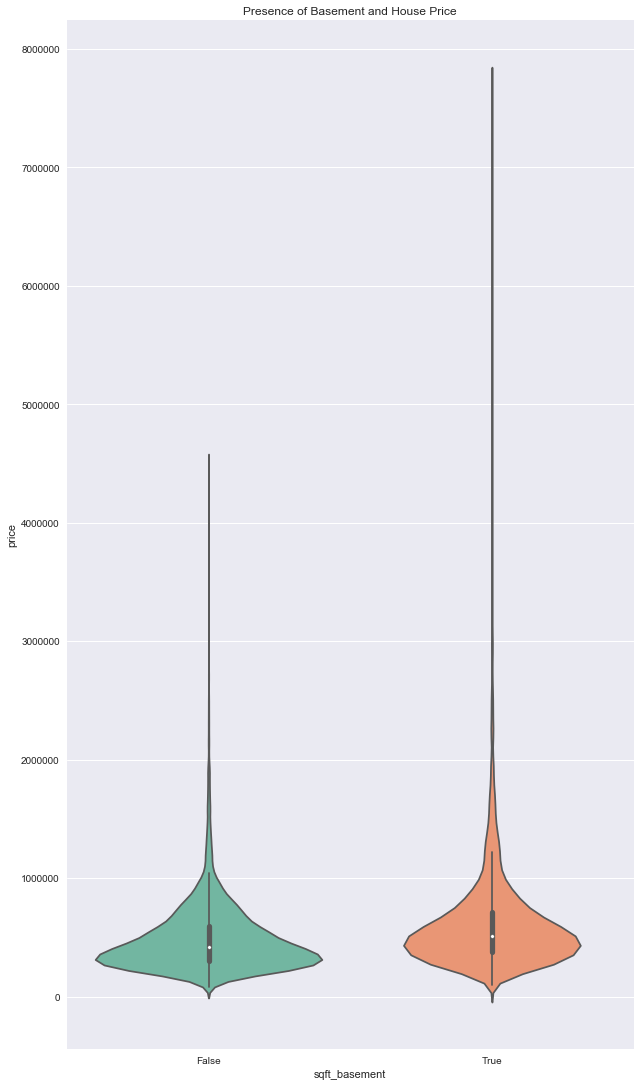

In [82]:
# Visualizing distribution of house prices using 'sqft_basement' as bool:
sns.set_palette('Set2')
fig = sns.catplot(x='sqft_basement', y='price', kind='violin', data=df, height=15, aspect=.6)
plt.title('Presence of Basement and House Price')
plt.show(fig)

This visualization, while skewed by some high priced outliers, suggests that there is a visually significant difference in the distribution of price based solely on the presence of a basement. Before making a decision regarding our treatment of the 'sqft_basement' column, let's review the data more closely.

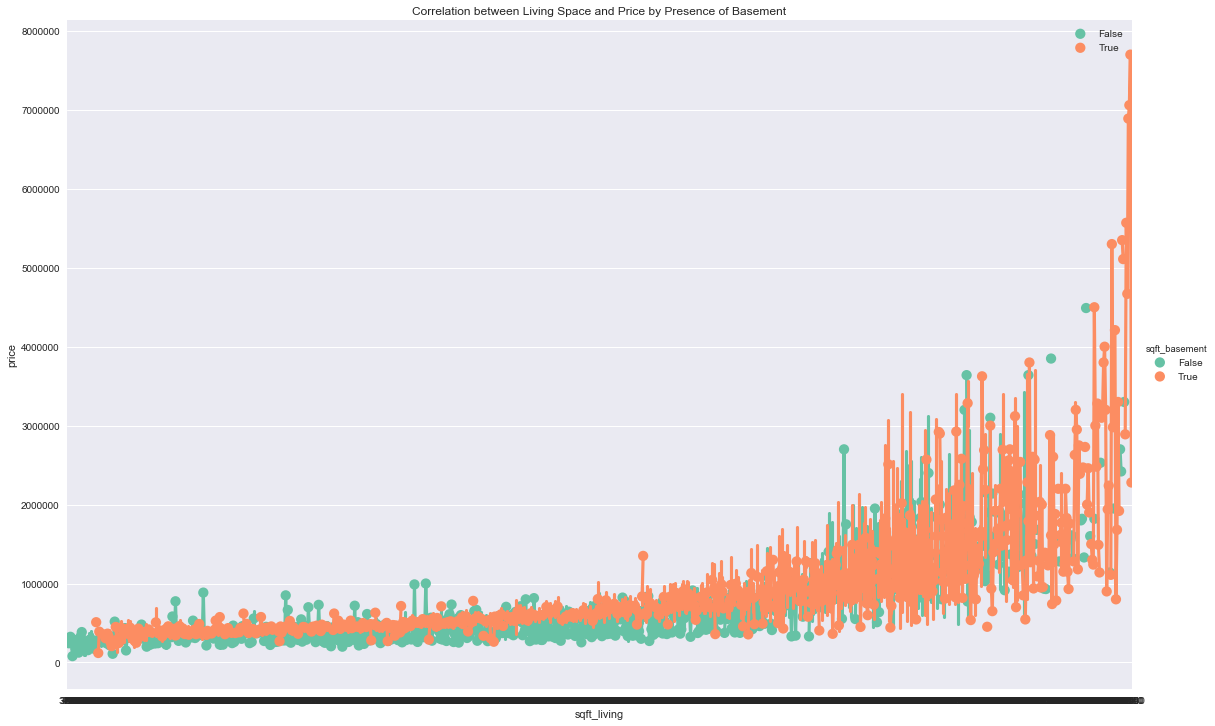

In [83]:
# Visualizing correlation between 'sqft_living' and 'price'
# by 'sqft_basement':
sns.set_palette('Set2')
fig = sns.catplot(x='sqft_living', y='price', hue='sqft_basement', data=df, height=10, aspect=1.6,
                 kind='point')
plt.title('Correlation between Living Space and Price by Presence of Basement')
plt.legend(loc='best')
plt.show()

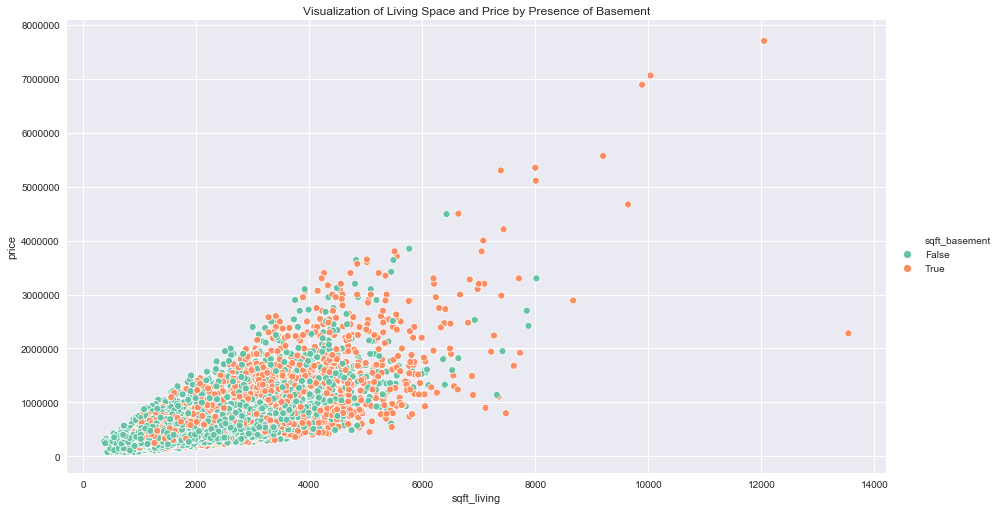

In [84]:
# Visualizing correlation between 'sqft_living' and 'price'
# by 'sqft_basement' pt2:
sns.set_palette('Set2')
fig = sns.relplot(x='sqft_living', y='price', hue='sqft_basement', data=df, height=7, aspect=1.8,
                 kind='scatter')
plt.title('Visualization of Living Space and Price by Presence of Basement')
plt.show()

Based on the visualizations above, we will keep 'sqft_basement' cast as bool for the purpose of creating our models. We will drop the 'sqft_above', 'sqft_living15', and 'sqft_lot15' columns to account for multicollinearity.

In [85]:
# Dropping the sqft_above, sqft_living15, and sqft_lot15 columns to account for multicollinearity:
df_mcl = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)
# Verifying output:
df_mcl.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

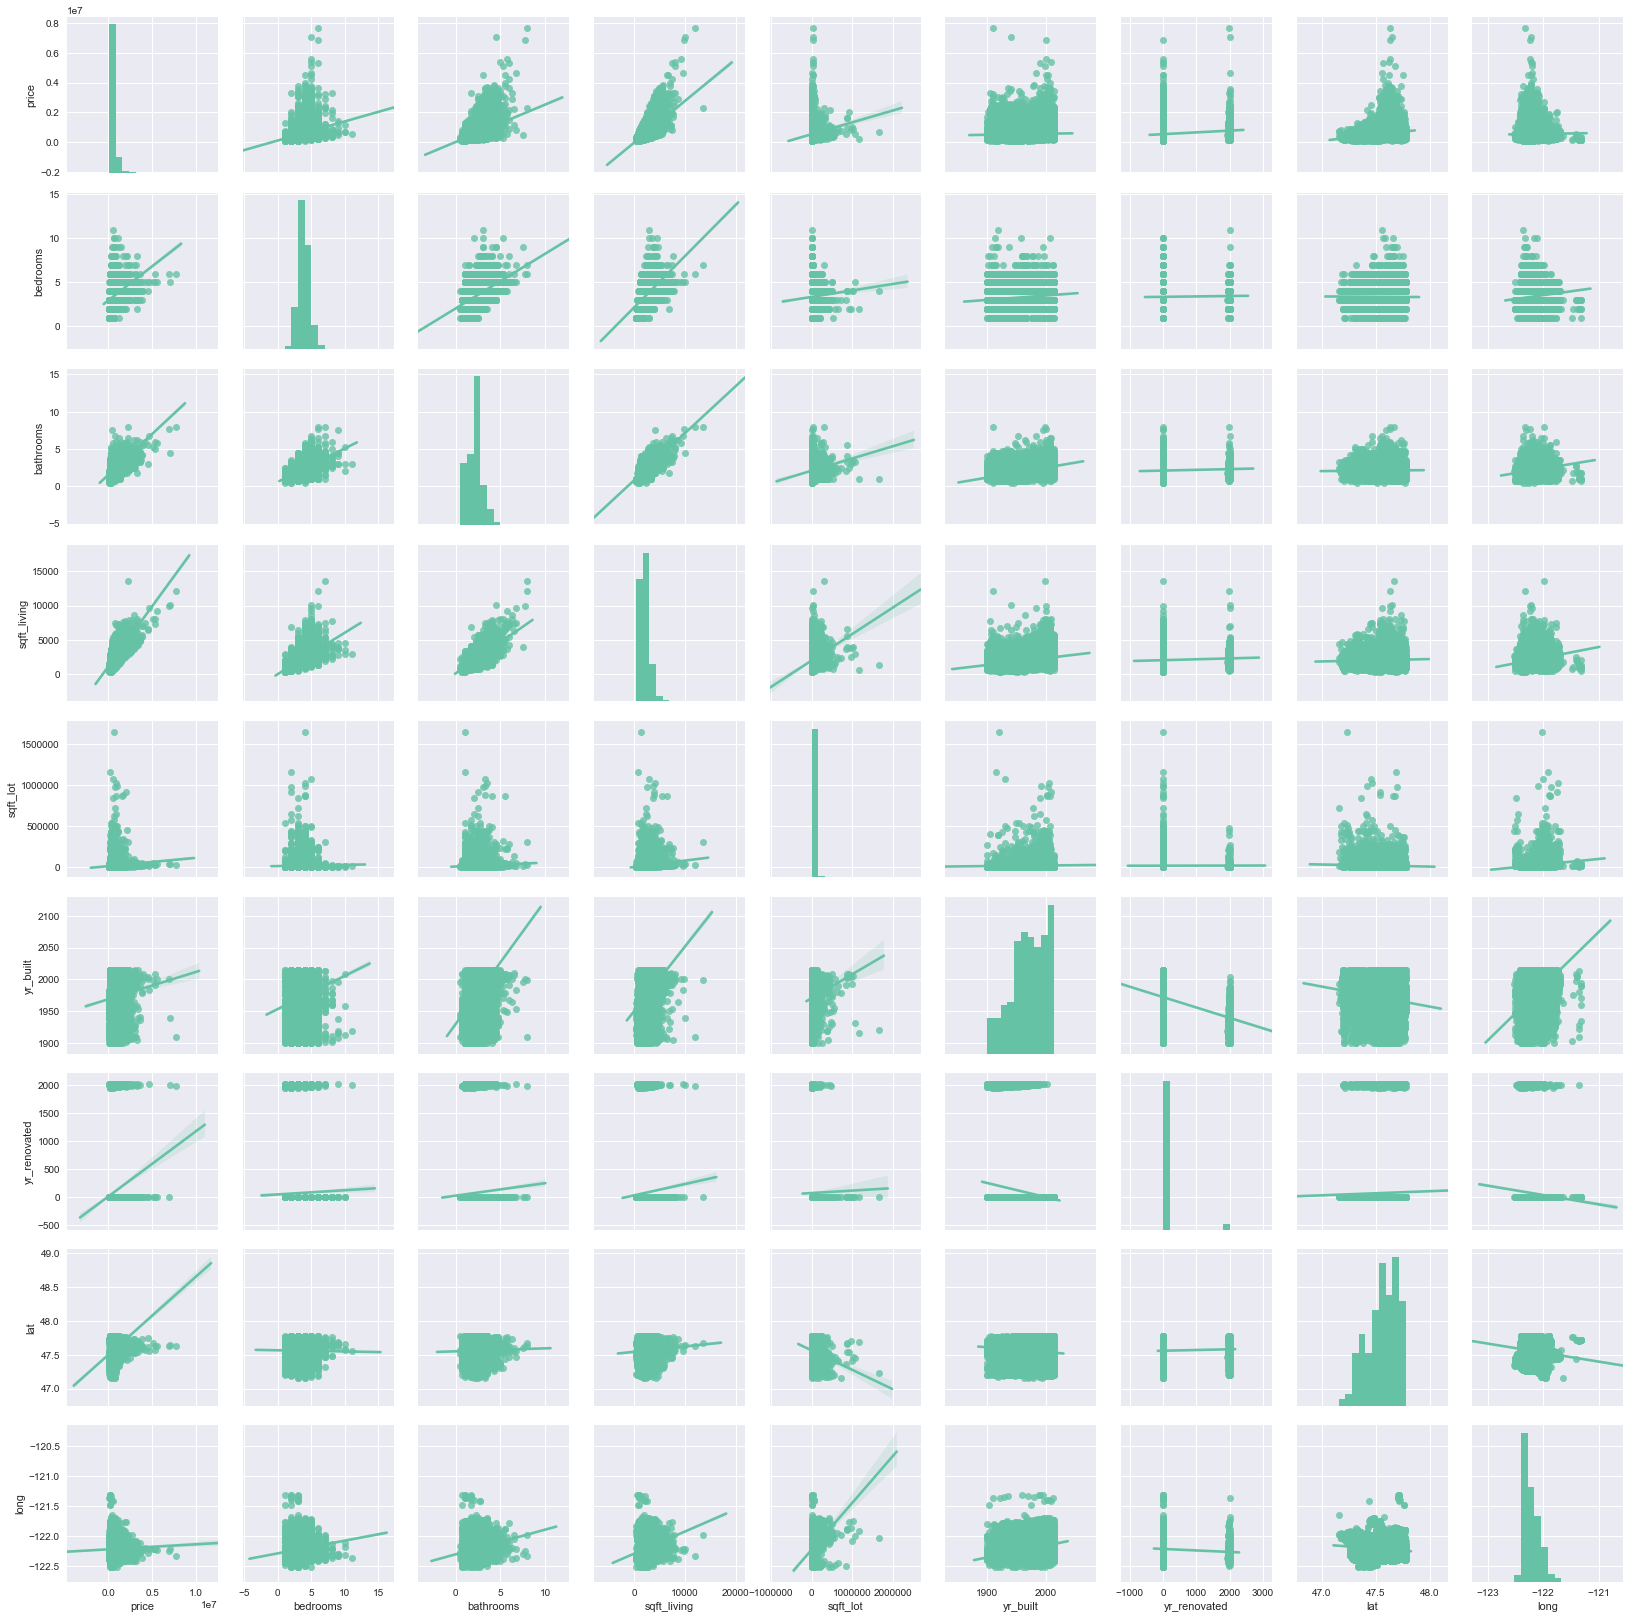

In [86]:
# Re-reviewing correlelogram:
sns.pairplot(data=df_mcl, kind="reg", vars=('price', 'bedrooms', 'bathrooms', 
                                             'sqft_living', 'sqft_lot', 
                                             'yr_built', 'yr_renovated', 
                                             'lat', 'long'), palette='Set2')

plt.show()

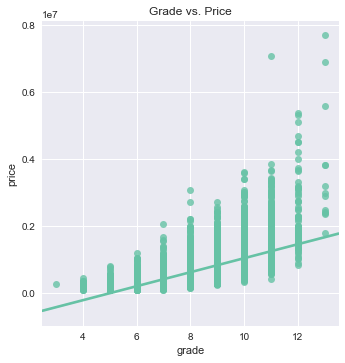

In [87]:
# Examining the correlation between 'grade' and 'price':
sns.pairplot(df_mcl, kind="reg", x_vars = ("grade"),
             y_vars="price", height=5, aspect=1)
plt.title('Grade vs. Price', loc='center')
plt.show()

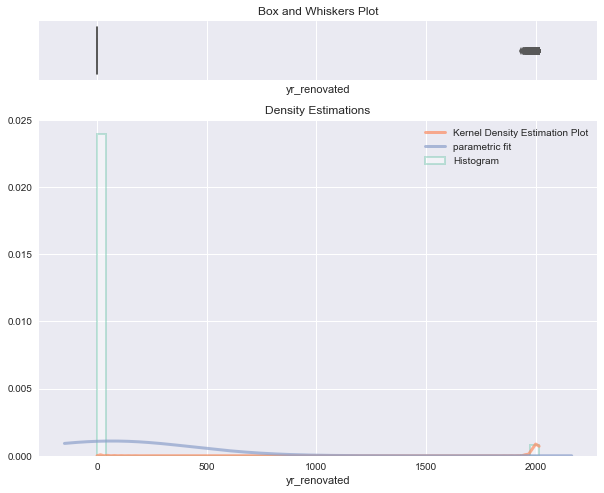

In [88]:
# Examining correlation between 'yr_renovated' and 'price':
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8))
sns.distplot(df_mcl.yr_renovated,
            hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'#66C2A5',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "#FC8D62",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : '#8DA0CB',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=df_mcl.yr_renovated, ax = ax,color = '#66C2A5')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .025))
plt.ylim(0,0.025)
plt.legend(loc='best')

It appears that the column mode of 0 (suggesting no renovations have taken place) it skewing the results. Let's attempt that visualization again after removing all datapoints with a 'yr_renovated' value of 0.

In [89]:
# Selecting data with non-0 values for 'yr_renovated':
reno_df = df_mcl[(df_mcl.yr_renovated != 0)]
# Verifying Output:
print(f'Unique Values: \n{reno_df.yr_renovated.unique()}.')
print(f'Number of Values Remaining: \n{reno_df.yr_renovated.value_counts().sum()}.')
print(f'Number of Datpoints Remaining: \n{len(reno_df.yr_renovated.unique())}.')

Unique Values: 
[1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954. 2014.
 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998. 1970.
 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979. 1997.
 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951. 1962.
 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964. 1973.
 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.].
Number of Values Remaining: 
744.
Number of Datpoints Remaining: 
69.


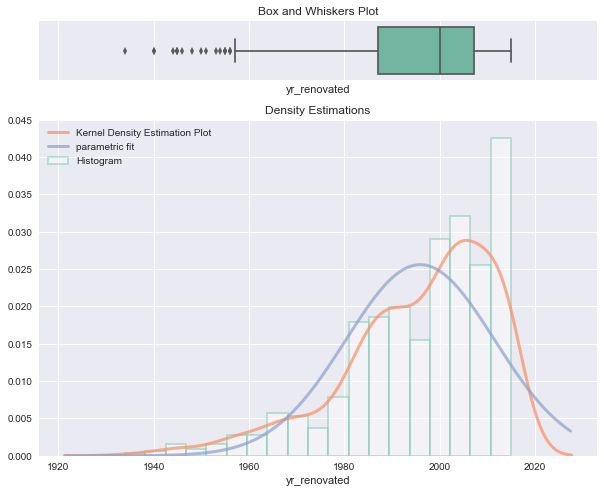

In [90]:
# Re-examining correlation between 'yr_renovated' and 'price' for reno_df:
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8))
sns.distplot(reno_df.yr_renovated,
            hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'#66C2A5',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "#FC8D62",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : '#8DA0CB',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=reno_df.yr_renovated, ax = ax, color = '#66C2A5')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .045))
plt.ylim(0,0.045)
plt.legend(loc='best')

Based on the data, it appears that renovation has become much more common since approximately the year 2000, and continues to increase in frequency until the daterange of the dataset. This could be due to real trends in home renovation, but might also represent an improvement in tracking this datapoint with modern technology. After removing 0 values, let's investigate how our features correlate with this new subset of data representing all houses that have been renovated.

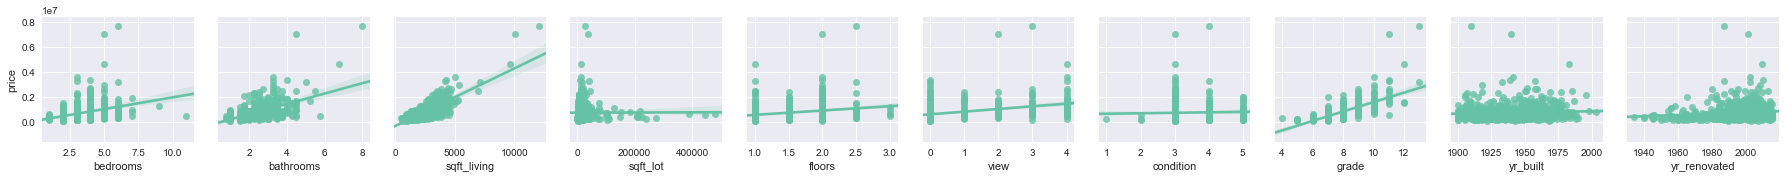

In [91]:
# Reviewing correlation within reno_df data subset:
sns.pairplot(data=reno_df, x_vars=('bedrooms', 'bathrooms', 
                               'sqft_living', 'sqft_lot', 'floors', 'view', 
                               'condition', 'grade', 'yr_built', 'yr_renovated'), 
             y_vars='price', kind="reg", palette='Set2')

While our results are promising, we must also consider the effect of discarding such a large proportion of the dataset.  In order to account for this factor, we will recast 'yr_renovated' as bool type.

Now that we've strategically explored relationships between the features and target variable of the dataset, let's visualize the distribution of each feature before creating our models to predict sale prices of additional homes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20d22e80>,
      dtype=object)

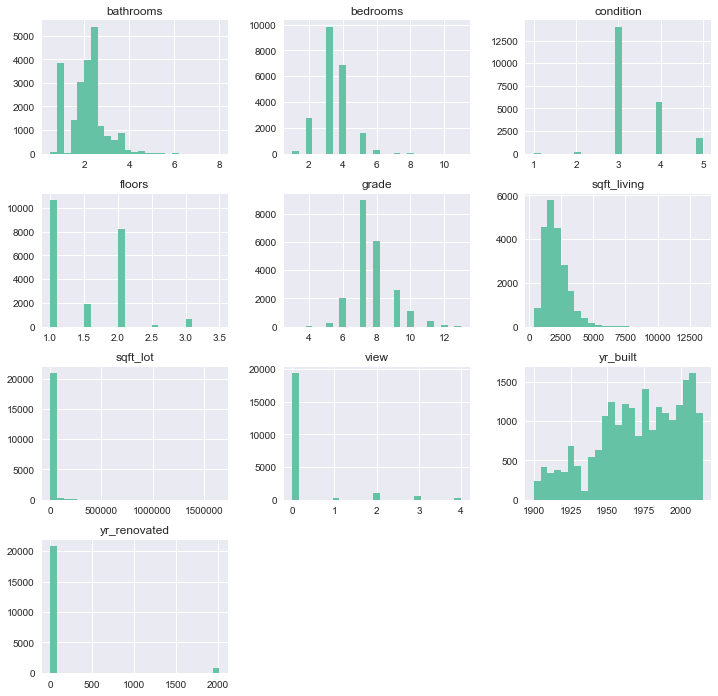

In [92]:
df_mcl.hist(column=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 
                    'floors', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'], 
           bins=25, figsize=(12,12))

In order to create an effective model, we should attempt to normalize the distribution of features.

Let's begin by:
- Casting 'yr_renovated' as type bool in a new column
- Log scaling 'price', 'bathrooms', and 'sqft_lot' in new columns
- One hot encoding 'zipcode' and 'view' in new columns

In [93]:
# Casting yr_renovated to bool in new column:
df_mcl['reno_bool'] = df_mcl['yr_renovated'].astype(bool)
# Verifying output:
print(f'Unique Values: {df_mcl.reno_bool.unique()}.')

Unique Values: [False  True].


In [94]:
# Log Scaling 'price', 'bathrooms', and 'sqft_lot' in new columns:
log_price = np.log(df_mcl.price)
log_bathrooms = np.log(df_mcl.bathrooms)
log_sqft_lot = np.log(df_mcl.sqft_lot)

df_mcl['log_price'] = log_price
df_mcl['log_bathrooms'] = log_bathrooms
df_mcl['log_sqft_lot'] = log_sqft_lot

In [95]:
# Dropping 'old' columns:
df_mcl.drop(['price', 'bathrooms', 'sqft_lot'], axis=1, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f7969b0>,
      dtype=object)

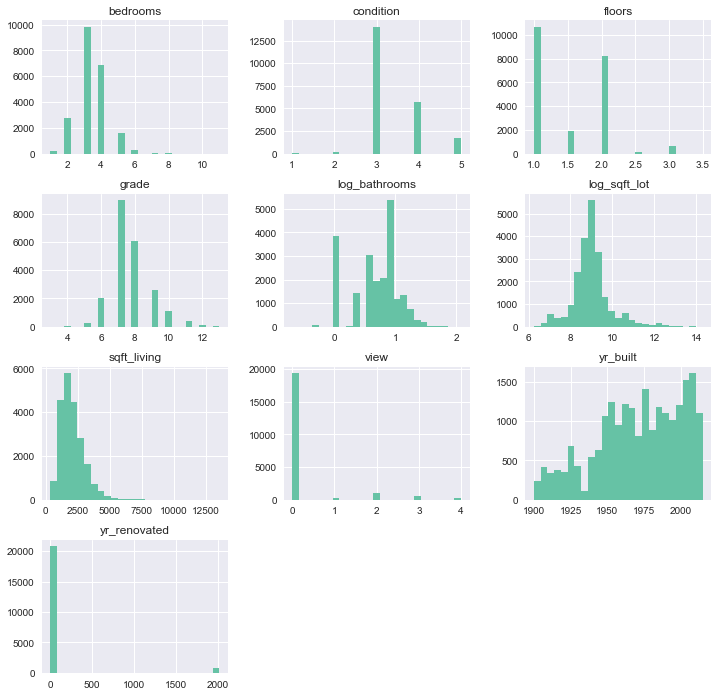

In [96]:
# Reviewing variable distribution before modeling:
df_mcl.hist(column=['bedrooms', 'log_bathrooms', 'sqft_living', 'log_sqft_lot', 
                    'floors', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'], 
           bins=25, figsize=(12,12))

In [97]:
# Re-checking dataframe header:
df_mcl.head()

,date,bedrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,reno_bool,log_price,log_bathrooms,log_sqft_lot
0,2014-10-13,3,1180,1.0,False,0.0,3,7,False,1955,0.0,98178,47.5112,-122.257,False,12.309982,0.000000,8.639411
1,2014-12-09,3,2570,2.0,False,0.0,3,7,True,1951,1991.0,98125,47.7210,-122.319,True,13.195614,0.810930,8.887653
2,2015-02-25,2,770,1.0,False,0.0,3,6,False,1933,0.0,98028,47.7379,-122.233,False,12.100712,0.000000,9.210340
3,2014-12-09,4,1960,1.0,False,0.0,5,7,True,1965,0.0,98136,47.5208,-122.393,False,13.311329,1.098612,8.517193
4,2015-02-18,3,1680,1.0,False,0.0,3,8,False,1987,0.0,98074,47.6168,-122.045,False,13.142166,0.693147,8.997147


As discussed previously, there is a definite correlation between sqft_living and house sale price, as expected. House sale price seems to "cluster" by zipcode or neighborhood. Before discarding sqft_living from our model, let's first examine how house sale price varies by house location (longitude/latitude).

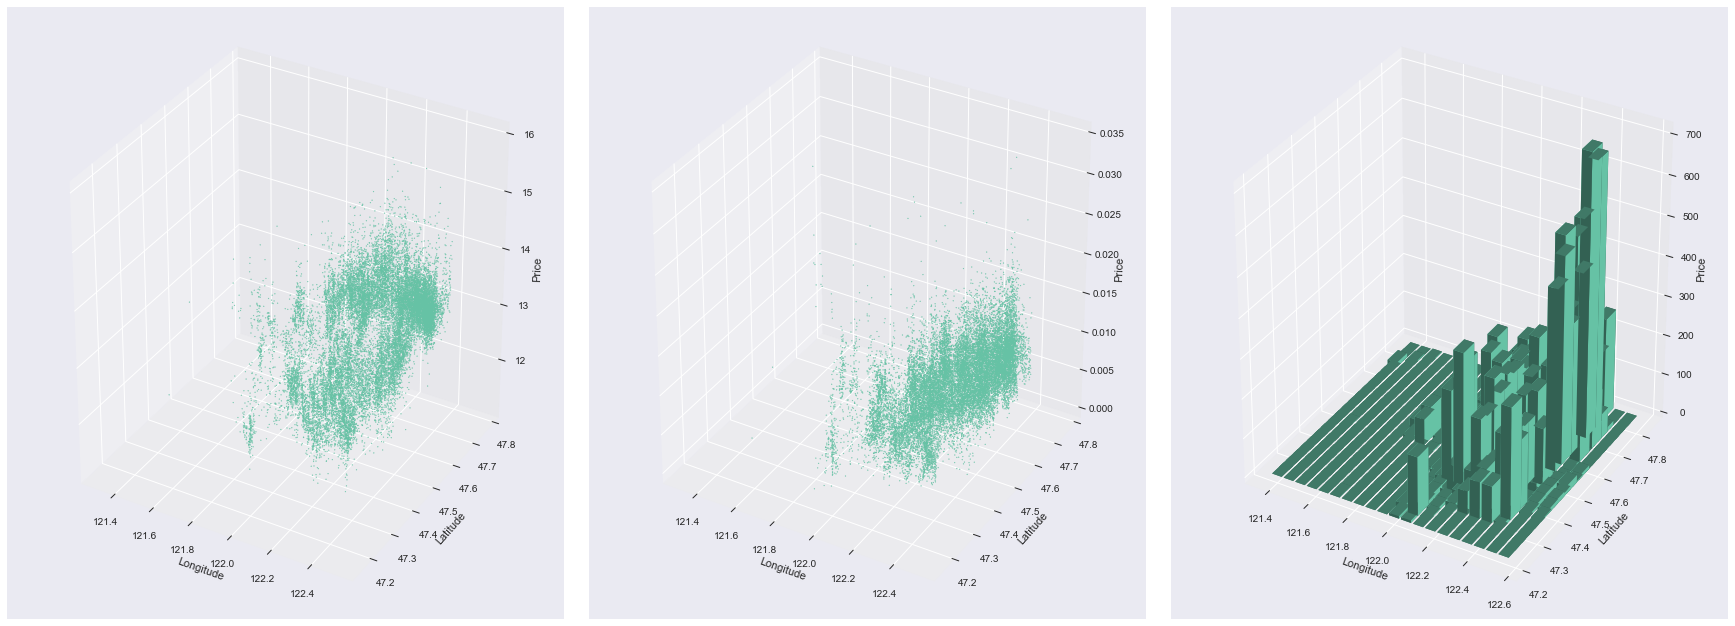

In [98]:
# Visualizing price distribution by lat/long:
fig = plt.figure()
fig.set_size_inches(11,4)

# Adding first axis for scatter 1:
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(-df_mcl.long, df_mcl.lat, log_price, cmap=cm.coolwarm, s=.9, alpha=0.8)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_zlabel('Price')

# Adding second axis for scatter 2 (dividing log_price by
# sqft_living to visualize change in price based on house size
# by lat/long:
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(-df_mcl.long, df_mcl.lat, df_mcl.log_price/df_mcl.sqft_living, cmap=cm.coolwarm, s=.9, alpha=0.8)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
ax2.set_zlabel('Price')

# Adding third axis for 3d barplot:
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.set_xlabel('Longitude')
ax3.set_ylabel('Latitude')
ax3.set_zlabel('Price')
x = -df_mcl.long
y = df_mcl.lat
hist, xedges, yedges = np.histogram2d(x, y, bins=20, range=[[x.min(), x.max()], [y.min(), y.max()]])

# Adding arrays to anchor 3d bars:
xpos, ypos = np.meshgrid(xedges[:-1] + 0.05, yedges[:-1] + 0.05, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Adding array to provide dimension:
dx = dy = 0.05 * np.ones_like(zpos)
dz = hist.ravel()

ax3.bar3d(xpos, ypos, zpos, dx, dy, dz, cmap=cm.coolwarm, zsort='average')


plt.tight_layout(pad=1.08, h_pad=2.5, w_pad=2.5, rect=(-1.1, -1.1, 1.1, 1.1))

In [99]:
# Removing sqft_living to attempt to reduce skew resulting from multicollinearity:
df_mcl.drop(['sqft_living'], axis=1, inplace=True)

In [100]:
# Creating dummy vars for one hot encoding categorical vars:
zipcode_dum = pd.get_dummies(df_mcl.zipcode, prefix='Zipcode')
view_dum = pd.get_dummies(df_mcl.view, prefix = 'View')

In [101]:
# Merging dummy vars with df:
df_mc2 = pd.concat([df_mcl, view_dum, zipcode_dum], axis=1)

In [102]:
# Verifying Output:
df_mc2.head()

,date,bedrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,...,Zipcode_98146,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199
0,2014-10-13,3,1.0,False,0.0,3,7,False,1955,0.0,...,0,0,0,0,0,0,1,0,0,0
1,2014-12-09,3,2.0,False,0.0,3,7,True,1951,1991.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,2,1.0,False,0.0,3,6,False,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,4,1.0,False,0.0,5,7,True,1965,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,3,1.0,False,0.0,3,8,False,1987,0.0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# Dropping 'old' columns:
df_mc2.drop(['zipcode', 'view'], axis=1, inplace=True)

In [104]:
# Verifying Output:
df_mc2.head()

,date,bedrooms,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,lat,...,Zipcode_98146,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199
0,2014-10-13,3,1.0,False,3,7,False,1955,0.0,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,2014-12-09,3,2.0,False,3,7,True,1951,1991.0,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,2015-02-25,2,1.0,False,3,6,False,1933,0.0,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,2014-12-09,4,1.0,False,5,7,True,1965,0.0,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,2015-02-18,3,1.0,False,3,8,False,1987,0.0,47.6168,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df_mc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 90 columns):
date             21597 non-null datetime64[ns]
bedrooms         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null bool
condition        21597 non-null int64
grade            21597 non-null int64
sqft_basement    21597 non-null bool
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
lat              21597 non-null float64
long             21597 non-null float64
reno_bool        21597 non-null bool
log_price        21597 non-null float64
log_bathrooms    21597 non-null float64
log_sqft_lot     21597 non-null float64
View_0.0         21597 non-null uint8
View_1.0         21597 non-null uint8
View_2.0         21597 non-null uint8
View_3.0         21597 non-null uint8
View_4.0         21597 non-null uint8
Zipcode_98001    21597 non-null uint8
Zipcode_98002    21597 non-null uint8
Zipcode_98003    21597 non-null uin

In [106]:
df_mc2.iloc[:,9:90].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 81 columns):
lat              21597 non-null float64
long             21597 non-null float64
reno_bool        21597 non-null bool
log_price        21597 non-null float64
log_bathrooms    21597 non-null float64
log_sqft_lot     21597 non-null float64
View_0.0         21597 non-null uint8
View_1.0         21597 non-null uint8
View_2.0         21597 non-null uint8
View_3.0         21597 non-null uint8
View_4.0         21597 non-null uint8
Zipcode_98001    21597 non-null uint8
Zipcode_98002    21597 non-null uint8
Zipcode_98003    21597 non-null uint8
Zipcode_98004    21597 non-null uint8
Zipcode_98005    21597 non-null uint8
Zipcode_98006    21597 non-null uint8
Zipcode_98007    21597 non-null uint8
Zipcode_98008    21597 non-null uint8
Zipcode_98010    21597 non-null uint8
Zipcode_98011    21597 non-null uint8
Zipcode_98014    21597 non-null uint8
Zipcode_98019    21597 non-null uint8
Zipcode_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22343208>,
      dtype=object)

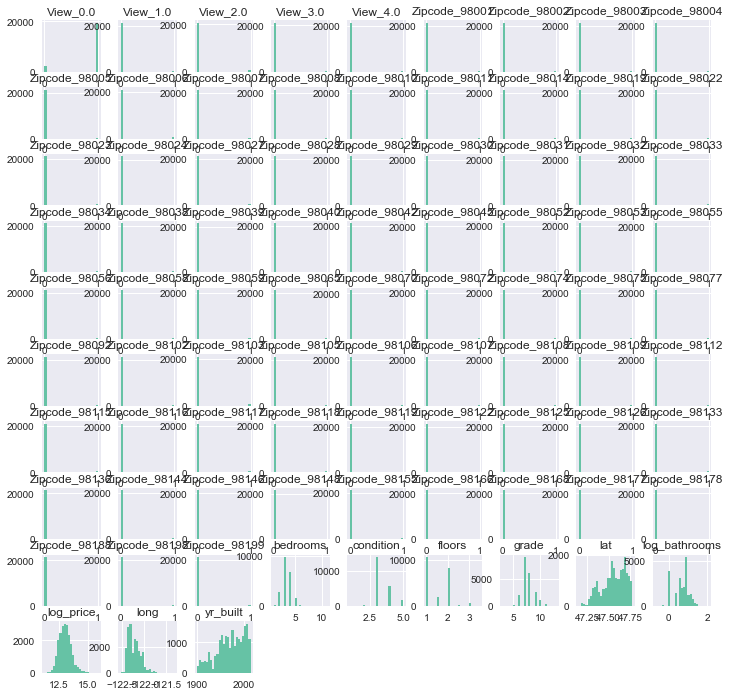

In [107]:
# Checking distribution of newly manipulated features:
df_mc2.hist(column=['bedrooms', 'floors', 'condition', 
                    'grade', 'yr_built', 'lat', 'long', 'log_price', 'log_bathrooms', 
                    'View_0.0', 'View_1.0', 'View_2.0','View_3.0', 'View_4.0', 'Zipcode_98001', 
                    'Zipcode_98002', 'Zipcode_98003', 'Zipcode_98004', 'Zipcode_98005', 'Zipcode_98006', 
                    'Zipcode_98007', 'Zipcode_98008', 'Zipcode_98010', 'Zipcode_98011', 
                    'Zipcode_98014', 'Zipcode_98019', 'Zipcode_98022', 'Zipcode_98023', 
                    'Zipcode_98024', 'Zipcode_98027', 'Zipcode_98028', 'Zipcode_98029', 
                    'Zipcode_98030', 'Zipcode_98031', 'Zipcode_98032', 'Zipcode_98033', 
                    'Zipcode_98034', 'Zipcode_98038', 'Zipcode_98039', 'Zipcode_98040', 
                    'Zipcode_98042', 'Zipcode_98045', 'Zipcode_98052', 'Zipcode_98053', 
                    'Zipcode_98055', 'Zipcode_98056', 'Zipcode_98058', 'Zipcode_98059', 
                    'Zipcode_98065', 'Zipcode_98070', 'Zipcode_98072', 'Zipcode_98074', 
                    'Zipcode_98075', 'Zipcode_98077', 'Zipcode_98092', 'Zipcode_98102', 
                    'Zipcode_98103', 'Zipcode_98105', 'Zipcode_98106', 'Zipcode_98107', 
                    'Zipcode_98108', 'Zipcode_98109', 'Zipcode_98112', 'Zipcode_98115',
                    'Zipcode_98116', 'Zipcode_98117', 'Zipcode_98118', 'Zipcode_98119', 
                    'Zipcode_98122', 'Zipcode_98125', 'Zipcode_98126', 'Zipcode_98133', 
                    'Zipcode_98136', 'Zipcode_98144', 'Zipcode_98146', 'Zipcode_98148', 
                    'Zipcode_98155', 'Zipcode_98166', 'Zipcode_98168', 'Zipcode_98177', 
                    'Zipcode_98178', 'Zipcode_98188', 'Zipcode_98198', 'Zipcode_98199'], bins=25, figsize=(12,12))


With our feature variables approaching a more normal distribution, we are now prepared to begin modeling.

##### Step 4: Model
Use the inights derived from Data Exploration to create a multivariate linear regression model.

In [108]:
# Removing additional columns to account for Multicollinearity:
df_mc2.columns

Index(['date', 'bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'reno_bool',
       'log_price', 'log_bathrooms', 'log_sqft_lot', 'View_0.0', 'View_1.0',
       'View_2.0', 'View_3.0', 'View_4.0', 'Zipcode_98001', 'Zipcode_98002',
       'Zipcode_98003', 'Zipcode_98004', 'Zipcode_98005', 'Zipcode_98006',
       'Zipcode_98007', 'Zipcode_98008', 'Zipcode_98010', 'Zipcode_98011',
       'Zipcode_98014', 'Zipcode_98019', 'Zipcode_98022', 'Zipcode_98023',
       'Zipcode_98024', 'Zipcode_98027', 'Zipcode_98028', 'Zipcode_98029',
       'Zipcode_98030', 'Zipcode_98031', 'Zipcode_98032', 'Zipcode_98033',
       'Zipcode_98034', 'Zipcode_98038', 'Zipcode_98039', 'Zipcode_98040',
       'Zipcode_98042', 'Zipcode_98045', 'Zipcode_98052', 'Zipcode_98053',
       'Zipcode_98055', 'Zipcode_98056', 'Zipcode_98058', 'Zipcode_98059',
       'Zipcode_98065', 'Zipcode_98070', 'Zipcode_98072', 'Zipcode_98074',
       'Zipcode_98

In [109]:
# Removing confounding variables and verifying intercepts:
df_mc2.drop(['yr_built', 'reno_bool', 'lat', 'long', 'yr_renovated', 'View_0.0'], axis=1, inplace=True)

In [110]:
# View, Date, categorical columns causing issues:
df_mc2.rename(index=str, columns={'View_1.0': 'View1', 'View_2.0': 'View2', 
                                  'View_3.0': 'View3', 'View_4.0': 'View4'}, inplace=True)

df_mc2.drop(['date'], axis=1, inplace=True)

In [111]:
# Create model using 'log_price' as the dependent variable:
add_log = '+'.join(df_mc2.drop('log_price', axis=1).columns)
f = 'log_price ~' + add_log
model = smf.ols(formula=f, data = df_mc2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1520.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        00:18:44   Log-Likelihood:                 3785.1
No. Observations:               21597   AIC:                            -7406.
Df Residuals:                   21515   BIC:                            -6752.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.08

In [112]:
# Importing additional libraries for RFE:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [113]:
# Creating a loop using RFE to determine difference between
# R^2 and adjusted R^2
X = df_mc2.drop(['log_price'], axis=1)
y = df_mc2.log_price

r_list = []
adj_r_list = []
list_n = list(range(5,len(X.columns),10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print(f'r_squared: {r_squared}')
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(f'adjusted_r_squared: {adjusted_r_squared}')
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

r_squared: 0.09676319907136066
adjusted_r_squared: 0.09332053765664716
r_squared: 0.23290732299902372
adjusted_r_squared: 0.22998357104615208
r_squared: 0.36854331029760423
adjusted_r_squared: 0.36613653105824395
r_squared: 0.4359245201320763
adjusted_r_squared: 0.4337745624603663
r_squared: 0.47108429553287134
adjusted_r_squared: 0.46906834834655986
r_squared: 0.5014637334493477
adjusted_r_squared: 0.49956357662787554
r_squared: 0.5241305792994907
adjusted_r_squared: 0.5223168165172354
r_squared: 0.7372712637874821
adjusted_r_squared: 0.7362698806709336


The difference between our r_squared and adjusted_r_squared value is negligible, correlation increases when adding additional features, but also increases the delta between r_squared and adjusted_r_squared as additional features are added. This indicates some overfitting when the maximum number of features are used.

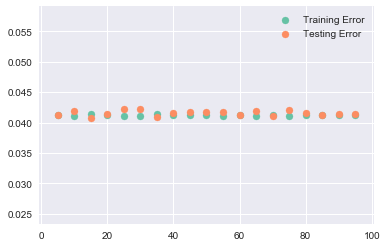

In [115]:
# Creating a loop that measures Mean Squared Error using a test-train split:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

It appears at though using an 80/20 test:train split will not result in overfitting based on our model.

In [116]:
from sklearn.model_selection import cross_val_score

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.04038461, -0.0431234 , -0.04109783, -0.04197376, -0.04020944,
       -0.04239509, -0.04038868, -0.04205807, -0.04171848, -0.04825637])

Low MSE values from our cross_val_score test indicate that overfitting is likely not an issue for our model.

In [117]:
# Re-running our model:
add_log = '+'.join(df_mc2.drop('log_price', axis=1).columns)
form = 'log_price ~' + add_log
model = smf.ols(formula= f, data= df_mc2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1520.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        00:19:31   Log-Likelihood:                 3785.1
No. Observations:               21597   AIC:                            -7406.
Df Residuals:                   21515   BIC:                            -6752.
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.0812      0.023    447.866      0.000      10.037      10.125
waterfront[T.True]        0.4530      0.021     21.643      0.000       0.412       0.494
sqft_basement[T.True]     0.0228      0.004      6.487      0.000       0.016       0.030
bedrooms                  0.0430      0.002     22.959      0.000       0.039       0.047
floors                    0.0351      0.004      9.135      0.000       0.028       0.043
condition                 0.0536      0.002     23.292      0.000       0.049       0.058
grade                     0.1671      0.002     91.502      0.000       0.164       0.171
log_bathrooms             0.1893      0.006     32.867      0.000       0.178       0.201
log_sqft_lot              0.1113      0.002     52.186      0.000       0.107       0.115
View1                     0.1612      0.012     13.985      0.000       0.139       0.184
View2                     0.1408      0.007     20.121      0.000       0.127       0.154
View3                     0.2296      0.010     24.126      0.000       0.211       0.248
View4                     0.3534      0.014     24.503      0.000       0.325       0.382
Zipcode_98001            -0.3492      0.011    -32.554      0.000      -0.370      -0.328
Zipcode_98002            -0.3412      0.014    -23.703      0.000      -0.369      -0.313
Zipcode_98003            -0.3420      0.012    -28.240      0.000      -0.366      -0.318
Zipcode_98004             0.8277      0.012     71.690      0.000       0.805       0.850
Zipcode_98005             0.3991      0.016     25.390      0.000       0.368       0.430
Zipcode_98006             0.3206      0.009     34.232      0.000       0.302       0.339
Zipcode_98007             0.3031      0.017     17.803      0.000       0.270       0.336
Zipcode_98008             0.3087      0.012     25.491      0.000       0.285       0.332
Zipcode_98010            -0.1135      0.020     -5.588      0.000      -0.153      -0.074
Zipcode_98011             0.1364      0.014      9.423      0.000       0.108       0.165
Zipcode_98014            -0.0740      0.018     -4.011      0.000      -0.110      -0.038
Zipcode_98019            -0.0128      0.015     -0.862      0.389      -0.042       0.016
Zipcode_98022            -0.3302      0.014    -24.447      0.000      -0.357      -0.304
Zipcode_98023            -0.3754      0.009    -41.064      0.000      -0.393      -0.357
Zipcode_98024             0.0518      0.023      2.270      0.023       0.007       0.097
Zipcode_98027             0.1766      0.010     17.463      0.000       0.157       0.196
Zipcode_98028             0.0891      0.012      7.396      0.000       0.065       0.113
Zipcode_98029             0.2709      0.011     23.669      0.000       0.248       0.293
Zipcode_98030          

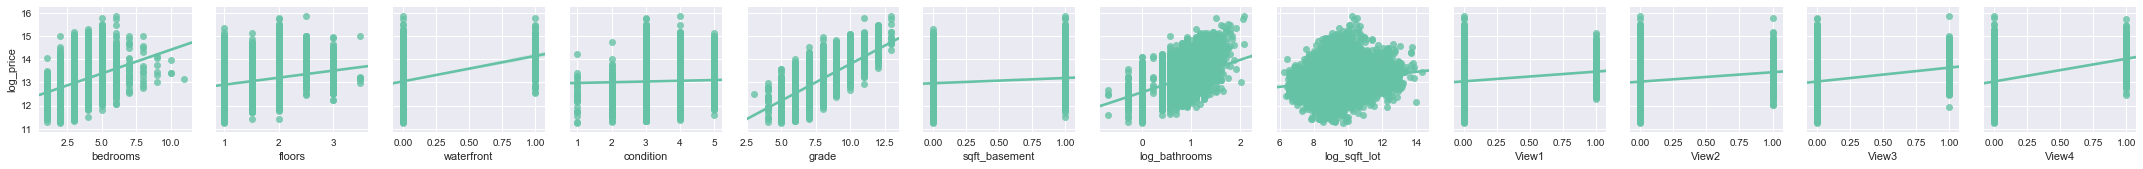

In [118]:
# Re-reviewing final correlelogram:
sns.pairplot(data=df_mc2, x_vars=('bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_basement', 'log_bathrooms', 'log_sqft_lot', 'View1',
       'View2', 'View3', 'View4'), 
             y_vars='log_price', kind="reg", palette='Set2')

In [119]:
df_finaltest = df_mc2.drop(['Zipcode_98001', 'Zipcode_98002',
       'Zipcode_98003', 'Zipcode_98004', 'Zipcode_98005', 'Zipcode_98006',
       'Zipcode_98007', 'Zipcode_98008', 'Zipcode_98010', 'Zipcode_98011',
       'Zipcode_98014', 'Zipcode_98019', 'Zipcode_98022', 'Zipcode_98023',
       'Zipcode_98024', 'Zipcode_98027', 'Zipcode_98028', 'Zipcode_98029',
       'Zipcode_98030', 'Zipcode_98031', 'Zipcode_98032', 'Zipcode_98033',
       'Zipcode_98034', 'Zipcode_98038', 'Zipcode_98039', 'Zipcode_98040',
       'Zipcode_98042', 'Zipcode_98045', 'Zipcode_98052', 'Zipcode_98053',
       'Zipcode_98055', 'Zipcode_98056', 'Zipcode_98058', 'Zipcode_98059',
       'Zipcode_98065', 'Zipcode_98070', 'Zipcode_98072', 'Zipcode_98074',
       'Zipcode_98075', 'Zipcode_98077', 'Zipcode_98092', 'Zipcode_98102',
       'Zipcode_98103', 'Zipcode_98105', 'Zipcode_98106', 'Zipcode_98107',
       'Zipcode_98108', 'Zipcode_98109', 'Zipcode_98112', 'Zipcode_98115',
       'Zipcode_98116', 'Zipcode_98117', 'Zipcode_98118', 'Zipcode_98119',
       'Zipcode_98122', 'Zipcode_98125', 'Zipcode_98126', 'Zipcode_98133',
       'Zipcode_98136', 'Zipcode_98144', 'Zipcode_98146', 'Zipcode_98148',
       'Zipcode_98155', 'Zipcode_98166', 'Zipcode_98168', 'Zipcode_98177',
       'Zipcode_98178', 'Zipcode_98188', 'Zipcode_98198', 'Zipcode_98199'], axis=1, inplace=True)

In [120]:
df_mc2.head()

,bedrooms,floors,waterfront,condition,grade,sqft_basement,log_price,log_bathrooms,log_sqft_lot,View1,View2,View3,View4
0,3,1.0,False,3,7,False,12.309982,0.000000,8.639411,0,0,0,0
1,3,2.0,False,3,7,True,13.195614,0.810930,8.887653,0,0,0,0
2,2,1.0,False,3,6,False,12.100712,0.000000,9.210340,0,0,0,0
3,4,1.0,False,5,7,True,13.311329,1.098612,8.517193,0,0,0,0
4,3,1.0,False,3,8,False,13.142166,0.693147,8.997147,0,0,0,0


In [121]:
cols = list(df_mc2.columns.values)
print(cols)

['bedrooms', 'floors', 'waterfront', 'condition', 'grade', 'sqft_basement', 'log_price', 'log_bathrooms', 'log_sqft_lot', 'View1', 'View2', 'View3', 'View4']


In [122]:
# Rearranging Columns to select price:
df_mc2 = df_mc2[['log_price', 'bedrooms', 'floors', 'waterfront', 'condition', 'grade', 'sqft_basement', 'log_bathrooms', 'log_sqft_lot', 'View1', 'View2', 'View3', 'View4']]

Text(0.5, 1.0, 'Multicollinearity between Variables in the King County Housing Dataset')

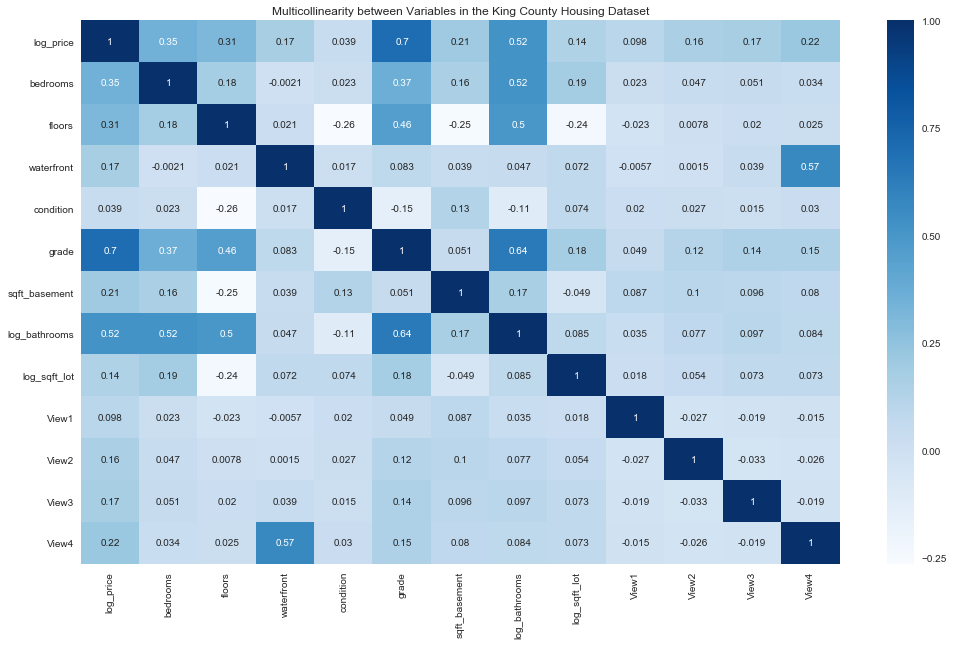

In [123]:
# Evaluating multicollinearity:
corr = df_mc2.corr()
fig = plt.figure(figsize=(17,10))
sol = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', cbar=True)
ax.set_title("Multicollinearity between Variables in the King County Housing Dataset")

As we hoped, there is significantly less multicollinearity between features after data manipulation.  We can see that bathrooms are more strongly correlated than bedrooms with house sale price.  It appears that grade may have a stronger correlation with price than determined previously. Additionally, it appears that 'View4' contains the most houses with views of the water. 

Below, we'll interpret these results in combinations with the results from our modeling to proide insights to the client to maximize ROI when flipping/renovating houses in the King County Market.

##### Step 5: Interpret
Evaluate the reliability of our model along with our results and their implications for our client seeking to invest/renovate homes in King County to maximize profitability.

As a reminder, below are the questions we sought to answer in section 3, along with their implications for the client.

1. How does location influence house sale price?
    - Our goal is to identify "hot" markets where house renovation will likely yield the greatest increase in house sale price.
2. Which feature most strongly influences house sale price?
    - This data will allow us to recommend specific recommendations regarding the most cost effective improvements to make during renovation in order to increase house sale price.
3. Is there significant multicollinearity in our dataset that might diminish the efficacy of our models? (see Step 4)

4. Which is a better predictor of house sale price, size of living space or size of lot?

In the following summation, I will answer the questions above as well as provide some additional insight to the client based on the results of modeling.

**Interpretation of Results:**
- The house size, number of bathrooms, and number of bedrooms are the strongest predictors for house sale price.
- The correlations between house size, lot size, and house sale price are heavily dependent on location (analyzed by zipcode).

**Predictive Quality of Model:**
- The R squared value for the model is 0.851, suggesting that the model is a good predictor of future house prices based on the data provided by the client.

**Potential counfounding factors to Model Quality:**
- There are several factors which were not accounted for in this model due to lack of data, including:
    - Incomplete data for renovation/presence of basement
    - Incomplete data (likely) for the number of houses that had been renovated (the vast majority of houses had no record of being renovated at any point in time), likely due to either incomplete building permit data or a high number of unrecorded renovations completed.
- Only linear regression was used in the creation of this model, when some variables may not be able or are best represented using different analytical techniques.


**Suggestions to client:**
- When considering whether to purchase additional land, renovate an existing space, or add additional square footage to a house for renovation, the relative values of square footage in living/lot size should be considered by zipcode or by area if possible.
- The zipcodes with the highest potential for upward mobility in sale price following renovation are: '98074' '98053' '98006' '98033'. These zipcodes have the highest variance in price and the highest "top-end" sale prices. I would recommend that the client primarily target houses in these zipcodes for the greateset ROI post renovation.
- If considering whether to add an additional bedroom or bathroom in renovation, adding a bathroom will more likely result in a higher sale price.
- In general, house size is a better predictor of house sale price than lot size. However, the client should perform additional research for specific areas, as factors missing from the dataset, such as population density, will definitely impact these results.


**Potential Future Improvements to Model:**
- The correlation between latitude/longitude and house price could be further explored to improve model reliability (or possibly by creating additional models) for the prediction of hosue sale prices in specific areas.
- Information such as average resident/neighborhood income as well as average family size etc would allow more accurate prediction of the "ideal" price for houses in specific markets and may also influece the choice in renovations made by the client.
- Year of sale was not considered in the model above, but could improve model reliability. Additionally, regional/national economic trends (and also house sale prices) by year could be considered to further improve the reliability of the model.
- Additonal investigation of the correlation between lat/long and house sale price could suggest "outliers" that represent undervalued houses in certain areas that would yield the greatest ROI post-renovation.
- The correlation between 'grade' and house sale price should be investigated further in order to improve the reliability of the model.